![LogoUC3M](https://upload.wikimedia.org/wikipedia/commons/4/47/Acronimo_y_nombre_uc3m.png)

Aprendizaje Automático · Grado en Ingeniería Informática · Curso 2022/23
---
**Cuaderno 1** - Práctica 1: Predicción de la producción de energía solar
<br><br>
***Grupo Reducido 82 - Grupo de laboratorio 13***






# **Carga de datos**


Para comenzar, importaremos las librerías que necesitamos:

+ `linear-tree`: Implementación de los modelos de árboles.
+ `statsmodels`: Para los intervalos de confianza.


In [5]:
!pip install --upgrade linear-tree
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Una vez instaladas las bibliotecas necesarias, importamos **Numpy** y **Pandas** ya que los necesitaremos para el desarrollo de la práctica.
Destacar que nos referiremos a **Numpy** como *np* y a **Pandas** como *pd* por simplicidad.

In [6]:
import numpy as np
import pandas as pd

A continuación, cargaremos los datos necesarios. Dado que somos el grupo 13, usaremos los dos conjuntos de datos correspondientes.</br></br>
Por una parte, tenemos los **datos disponibles**, que nos servirán para entrenar, 
evaluar y construir el modelo final y por otra parte los **datos de competición** sobre los que usaremos el modelo final para hacer las predicciones correspondientes.</br></br>

In [7]:
# Datos disponibles.
disp_df = pd.read_csv("disp_st13ns1.txt.bz2",
                      compression="bz2",
                      index_col=0)

# Datos competición.
comp_df = pd.read_csv("comp_st13ns1.txt.bz2",
                      compression="bz2",
                      index_col=0)

# Mostramos la información de cada conjunto de datos.
print(f"El conjunto de datos disponibles tiene {len(disp_df)} instancias.")
print(f"El conjunto de datos de competición tiene {len(disp_df)} instancias.")

El conjunto de datos disponibles tiene 4380 instancias.

El conjunto de datos de competición tiene 4380 instancias.

A continuación, separamos la **matriz de atributos** (**X**) y el **vector de la variable de respuesta** *salida* (**y**).

In [8]:
# Datos.
X = disp_df.drop('salida', axis=1)

# Etiquetas.
y = disp_df.salida

También, definiremos las funciones auxiliares que nos ayudarán a evaluar nuestro desarrollo. Estas son encargadas de calcular las métricas de evaluación que usaremos para los modelos.

In [9]:
from sklearn import metrics

def mse (y_test, y_test_pred):
    '''Mean squared error.'''
    return metrics.mean_squared_error(y_test, y_test_pred)

def rmse (y_test, y_test_pred):
    '''Root mean squared error.'''
    return np.sqrt(mse(y_test, y_test_pred))

def mae (y_test, y_test_pred):
    '''Mean absolute error.'''
    return metrics.mean_absolute_error(y_test, y_test_pred)

Adicionalmente vamos a usar la biblioteca rich que nos permite mostrar las salidas por consola de manera más clara.

In [10]:
from rich import print

# **Análisis Exploratorio de Datos (EDA)**
Antes de comenzar, destacar que dado que los resultados deben ser reproducibles, hemos fijado la **semilla de números aleatorios** en los lugares adecuados. Para ello, hemos seleccionado como semilla el número del grupo de prácticas (*13*).</br></br>
Para poder realizar el análisis exploratorio de datos, llevaremos a cabo los siguientes pasos:

+ Número de instancias y atributos.
+ Tipo de atributos (numéricos o categóricos).
+ Missing values.
+ Tipo de problema (clasificación o regresión).


## **Número de instancias y atributos**
Los **datos disponibles** cuentan con 75 atributos y la variable de respuesta *salida*. Contiene 12 años de datos considerando una instancia por día y todos los años de 365 días. Por tanto, contamos con un total de **4380 instancias**.</br></br>

Los **datos de competición** cuentan con las mismas 75 variables de entrada que los datos disponibles y se trata de un conjunto con 2 años de datos y una instancia por día. En este caso, no se proporciona la variable de respuesta salida, dado que usaremos nuestro modelo final para hacer predicciones sobre estos datos como ya hemos indicado antes. Por tanto, contamos con un total de **733 instancias**.</br></br>

A continuación, profundizaremos más en los atributos, su significado y nomenclatura.</br></br>

Como podemos ver en la siguiente tabla, contamos con **15 atributos** diferentes, cada uno de ellos con su respectivo nombre (identificador) y con su unidad concreta. Estos atributos corresponden con **variables meteorológicas** diversas.</br></br>

| Atributo | Descripción | Unidades |
| :- | :- | -: |
| `apcp_sfc` | Precipitación acumulada de 3 horas en la superficie. | $\dfrac{kg}{m^2}$ |
| `dlwrf_sfc` | Promedio de flujo radiativo de onda larga hacia abajo en la superficie. | $\dfrac{W}{m^2}$ |
| `dswrf_sfc` | Promedio de flujo radiativo de onda corta hacia abajo en la superficie. | $\dfrac{W}{m^2}$ |
| `pres_msl` | La presión del aire al nivel medio del mar. | $Pa$ |
| `pwat_eatm`	 | Agua precipitable sobre toda la profundidad de la atmósfera. | $\dfrac{kg}{m^2}$ |
| `spfh_2m`	 | Humedad específica a 2 m sobre el suelo. | $\dfrac{kg}{kg}$ |
| `tcdc_eatm`	 | Cobertura total de nubes sobre toda la profundidad de la atmósfera. | $\%$ |
| `tcolc_eatm` | Condensado total integrado en la columna sobre toda la atmósfera. | $\dfrac{kg}{m^2}$ |
| `tmax_2m` | Temperatura máxima en las últimas 3 horas a 2 m sobre el suelo. | $K$ |
| `tmin_2m` | Temperatura mínima en las últimas 3 horas a 2 m sobre el suelo. | $K$ |
| `tmp_2m` | Temperatura actual a 2 m sobre el suelo.	| $K$ |
| `tmp_sfc` | Temperatura de la superficie. | $K$ |
| `ulwrf_sfc` | Radiación ascendente de onda larga en la superficie. | $\dfrac{kg}{m^2}$ |
| `ulwrf_tatm` | Radiación ascendente de onda larga en la parte superior de la atmósfera. | $\dfrac{kg}{m^2}$ |
| `uswrf_sfc` | Radiación ascendente de onda corta en la superficie. | $\dfrac{kg}{m^2}$ |

</br>Partiendo de los 15 atributos que podemos observar en la tabla anterior, se indica una variable en los datos para cada uno ellos en 5 momentos del día. Esto es, contamos con:</br></br>

$5\;instantes\;de\;tiempo\;\cdot\;15\;variables\;meteorológicas\;=\;75\;variables\;de\;entrada$

</br>Los instantes de tiempo vienen dados por una numeración del 1 al 5:
+ 1 $\rightarrow$ 12h
+ 2 $\rightarrow$ 15h
+ 3 $\rightarrow$ 18h
+ 4 $\rightarrow$ 21h
+ 5 $\rightarrow$ 24h

</br>Por tanto, cada variable meteorológica aparece en el conjunto de datos 5 veces, una por cada instante de tiempo. El instante de tiempo se indica en el subíndice $i$, donde $i=1,2,3,4,5$. Por ejemplo, $apcp\_sfc_1$ es la variable que indica la precipitación acumulada de 3 horas en la superficie a las 12h (instante de tiempo 1).

## **Tipo de atributos**.
Dentro de los diferentes tipos de atributos de los datos podemos encontrar los categóricos, numéricos u ordinales.</br></br>

En el caso de nuestros datos, podemos ver como claramente todos ellos son **atributos numéricos reales** a excepción de la variable de respuesta *salida*, la cual es un **atributo numérico entero**.</br></br>

Por tanto, dado que todos los datos con los que vamos a tratar son atributos numéricos, no tendremos que transformar ninguna variable categórica en one-hot-encoding, dado que no vamos a lidiar con ninguna variable de este tipo.


In [11]:
# Mostramos todos los datos.
print('Matriz de atributos:\n\n', X)
print('\n\nVector de la variable de respuesta:\n\n', y)

# Mostramos el tipo de dato de una variable meteorológica y de un valor de la variable de respuesta.
print('\nEjemplo de tipo de dato de variable meteorológica:', type(X['apcp_sf1_1'][0]))
print('Ejemplo de tipo de dato de variable de respuesta:', type(y[0]))

Matriz de atributos:

        apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1       0.000000    0.000000    0.000000    0.000000    0.000000  276.583582   
V2       0.000000    0.000000    0.011818    0.037273    0.543636  249.089505   
V3       0.014545    0.000000    0.000000    0.000000    0.002727  229.461820   
V4       0.000000    0.009091    0.000000    0.000000    0.000000  239.590321   
V5       0.000000    0.000000    0.000000    0.000000    0.000000  230.253657   
...           ...         ...         ...         ...         ...         ...   
V4376    0.000909    0.114545    0.352727    0.882727    1.379091  284.532288   
V4377    0.000909    0.000000    0.000000    0.000000    0.000000  251.460183   
V4378    0.000000    0.000000    0.000000    0.000000    0.000000  268.446164   
V4379    0.000000    0.000000    0.000000    0.000000    0.000000  268.225686   
V4380    0.000000    0.000000    0.000000    0.000000    0.000000  268.385348   

       dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  ...  ulwrf_t1_1  \
V1     246.514368  251.629031  264.832217  262.468350  ...  201.425894   
V2     282.460488  297.254822  315.532651  310.292719  ...  230.836691   
V3     215.177840  218.042184  245.620031  246.749223  ...  226.019290   
V4     261.169269  271.857217  258.001828  247.076775  ...  235.784869   
V5     235.563414  243.941731  266.031791  269.572826  ...  231.005317   
...           ...         ...         ...         ...  ...         ...   
V4376  277.760515  293.636938  337.863753  330.097956  ...  236.903184   
V4377  244.463848  248.985195  266.057689  265.432201  ...  244.682028   
V4378  271.475733  274.081410  287.933849  284.624115  ...  239.584692   
V4379  263.890245  271.744013  291.337566  291.260448  ...  270.318764   
V4380  265.254364  271.679615  291.476737  288.541684  ...  247.253002   

       ulwrf_t2_1  ulwrf_t3_1  ulwrf_t4_1  ulwrf_t5_1  uswrf_s1_1  uswrf_s2_1  \
V1     249.504475  251.942089  258.069677  254.249663         0.0    9.181818   
V2     200.094627  202.663639  196.833872  202.962007         0.0    4.545455   
V3     232.556009  233.298932  211.631876  210.620375         0.0   13.909091   
V4     235.189503  236.216754  244.018491  239.049223         0.0    5.454545   
V5     230.797569  233.680077  252.037280  246.291591         0.0    9.000000   
...           ...         ...         ...         ...         ...         ...   
V4376  236.348444  224.870748  175.644218  190.153040         0.0    6.818182   
V4377  243.310976  248.244164  263.429332  260.205636         0.0   10.000000   
V4378  221.705779  236.372099  273.823583  274.388403         0.0    7.909091   
V4379  257.707263  254.163126  281.832139  277.711556         0.0    9.727273   
V4380  241.352363  245.428872  257.719322  257.394481         0.0    9.000000   

       uswrf_s3_1  uswrf_s4_1  uswrf_s5_1  
V1      49.000000  103.000000   68.000000  
V2      19.000000   47.272727   32.909091  
V3      77.636364  141.090909   90.454545  
V4      28.909091   90.818182   62.636364  
V5      47.181818  102.272727   67.636364  
...           ...         ...         ...  
V4376   28.545455   27.181818   18.727273  
V4377   50.090909  104.545455   68.454545  
V4378   46.909091  102.000000   67.000000  
V4379   48.181818  104.909091   68.818182  
V4380   47.000000   98.636364   64.818182  

[4380 rows x 75 columns]

Vector de la variable de respuesta:

 V1       11119200
V2        5530500
V3        5596200
V4        4360500
V5       10572300
           ...   
V4376     3780900
V4377    11463300
V4378    11071200
V4379    11222700
V4380    10770600
Name: salida, Length: 4380, dtype: int64

Ejemplo de tipo de dato de variable meteorológica: <class 'numpy.float64'>

Ejemplo de tipo de dato de variable de respuesta: <class 'numpy.int64'>

Como se puede comprobar en las dos últimas llamadas realizadas, las variables de respuesta utilizan atributos del tipo `numpy.float64`, siendo estos valores **numéricos reales**. Por otra parte, la variable de respuesta *salida* utiliza valores del tipo `numpy.int64`, siendo estos valores **numéricos enteros**.


### **Missing values**.
A continuación, comprobaremos si existe algún **missing value**. Para ello, tomaremos el dataframe de datos disponibles creado anteriormente y haremos una suma de los posibles missing values existentes.


In [12]:
# Contamos el número de missing values.
disp_df.isnull().values.sum()

0

Como podemos ver en la anterior ejecución, podemos comprobar que **no existe ningún missing value**.

### **Tipo de problema**.
Como hemos podido ver anteriormente mostrando los datos en pantalla, este problema es claramente de **regresión**, dado que tendremos que construir un modelo para realizar **predicción numérica**.

### **Análisis de atributos**.
A continuación, realizaremos un análisis más profundo de los diferentes atributos con los que contamos. Nuestro objetivo aquí es comprobar si existen **correlaciones** entre las variables y estudiar de forma individual cada uno de ellos para ver su funcionamiento. De esta forma, veremos si podemos **prescindir** de algún atributo o **ajustar** los datos para continuar con la práctica.<br><br>

Por tanto, lo que haremos será calcular las **medias de los atributos** y hacer una **matriz** para ver la correlación entre las medias. Tras esto, haremos un pequeño análisis de cada atributo por separado en los distintos momentos del día.

In [13]:
variables_meteorologicas = ['apcp_sf', 'dlwrf_s', 'dswrf_s', 'pres_msl', 'pwat_eatm', 'spfh_2m', 'tcdc_eatm', 'tcolc_eatm', 'tmax_2m', 'tmin_2m', 'tmp_2m', 'tmp_sfc', 'ulwrf_sfc', 'ulwrf_tatm', 'uswrf_sfc']

mean_df = disp_df.iloc[:, :-1].groupby(np.arange(len(disp_df.columns)-1)//5, axis=1).mean()
mean_df.columns = [f'{name}_media' for name in variables_meteorologicas]
mean_df['salida'] = disp_df['salida']
print(mean_df)

apcp_sf_media  dlwrf_s_media  dswrf_s_media  pres_msl_media  \
V1          0.000000     260.405510     208.000000   101926.116761   
V2          0.118545     290.926037     120.727273   101249.524290   
V3          0.003455     231.010220     199.163636   101903.130682   
V4          0.001818     255.539082     181.072727   102395.532955   
V5          0.000000     249.072684     208.909091   100978.042614   
...              ...            ...            ...             ...   
V4376       0.546000     304.778290      87.818182   100995.622159   
V4377       0.000182     255.279823     208.000000   101558.770170   
V4378       0.000000     277.312254     204.181818   101256.869886   
V4379       0.000000     277.291592     209.454545   100085.594460   
V4380       0.000000     277.067550     201.636364   101064.356534   

       pwat_eatm_media  spfh_2m_media  tcdc_eatm_media  tcolc_eatm_media  \
V1            9.037209       0.003719         0.000545          0.001400   
V2           13.307411       0.004266         0.191273          0.190598   
V3            7.537060       0.002395         0.044182          0.044753   
V4            7.682174       0.002957         0.020909          0.020873   
V5           11.418779       0.003471         0.022909          0.024125   
...                ...            ...              ...               ...   
V4376        15.797961       0.005098         0.166909          0.167047   
V4377         8.761050       0.004488         0.000364          0.001105   
V4378        10.874096       0.003212         0.010909          0.010509   
V4379         8.664858       0.003496         0.005636          0.006218   
V4380        13.351457       0.004888         0.003636          0.004642   

       tmax_2m_media  tmin_2m_media  tmp_2m_media  tmp_sfc_media  \
V1        282.142500     279.260581    280.762140     280.926701   
V2        281.145418     278.180924    280.261834     280.343105   
V3        273.843006     270.516610    272.261575     273.564470   
V4        276.050982     273.473676    274.785691     275.572847   
V5        279.547464     275.895609    278.966826     278.851663   
...              ...            ...           ...            ...   
V4376     284.109560     281.561513    282.581503     282.738215   
V4377     281.982668     278.152787    280.218207     280.926219   
V4378     285.984576     282.335071    284.929866     284.845908   
V4379     290.105306     285.888011    288.397318     288.028490   
V4380     286.249309     282.517850    284.681485     285.289985   

       ulwrf_sfc_media  ulwrf_tatm_media  uswrf_sfc_media    salida  
V1          354.865220        243.038359        45.836364  11119200  
V2          346.875286        206.678167        20.745455   5530500  
V3          317.495674        222.825297        64.618182   5596200  
V4          329.077006        238.051768        37.563636   4360500  
V5          336.922521        238.762367        45.218182  10572300  
...                ...               ...              ...       ...  
V4376       361.962524        212.783927        16.254545   3780900  
V4377       354.240127        251.974427        46.618182  11463300  
V4378       369.549726        249.174911        44.763636  11071200  
V4379       388.614675        268.346570        46.327273  11222700  
V4380       375.002238        249.829608        43.890909  10770600  

[4380 rows x 16 columns]

Como podemos ver, hemos realizado las medias de los atributos, resultando en un total de **15 columnas** además de la variable de salida. A continuación veremos si existen relaciones entre estas variables:

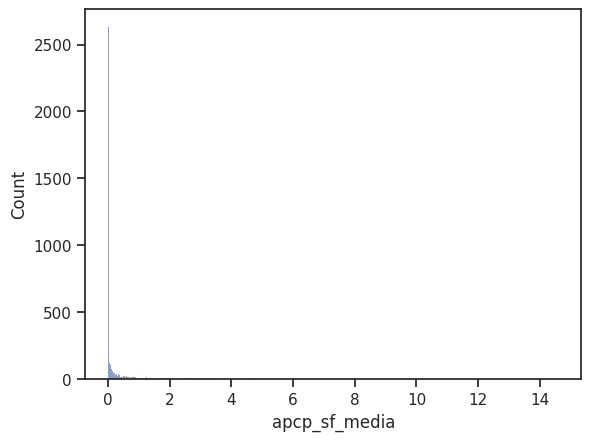

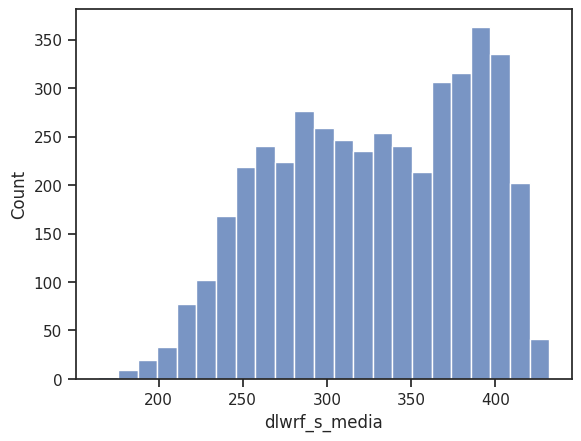

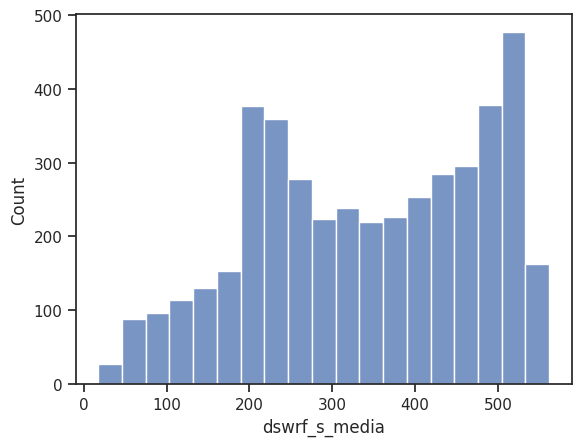

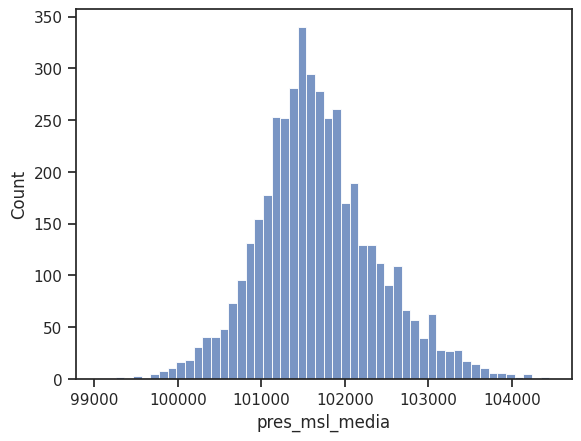

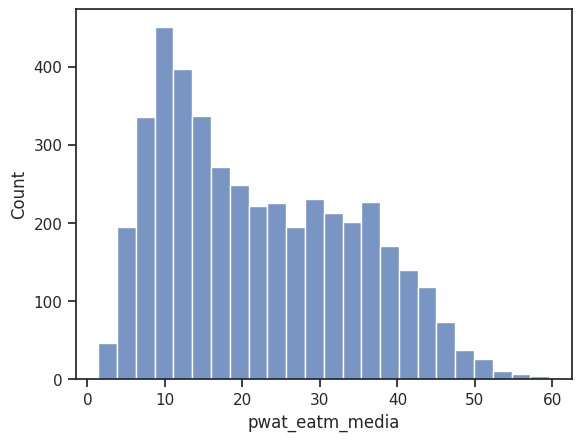

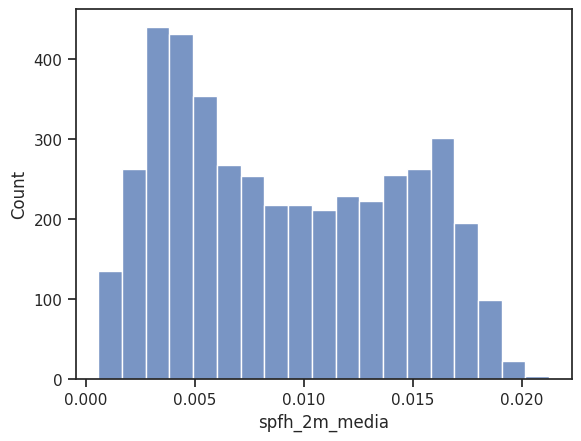

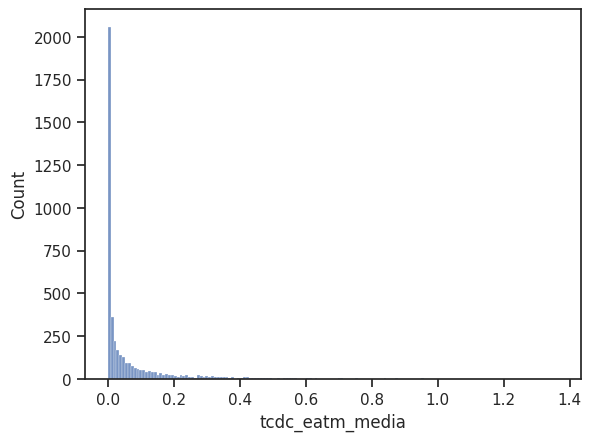

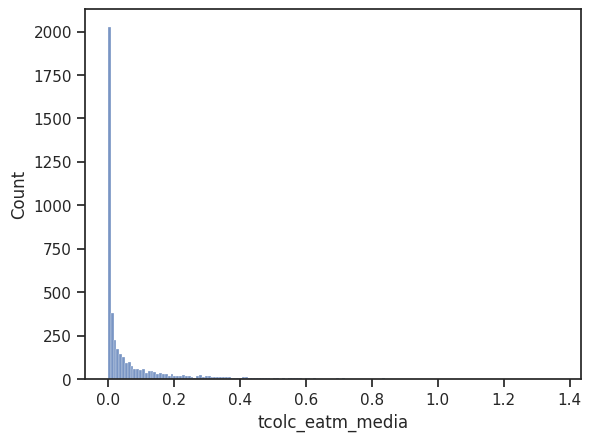

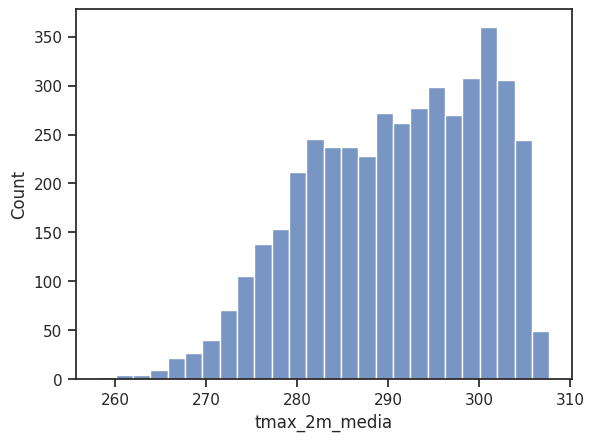

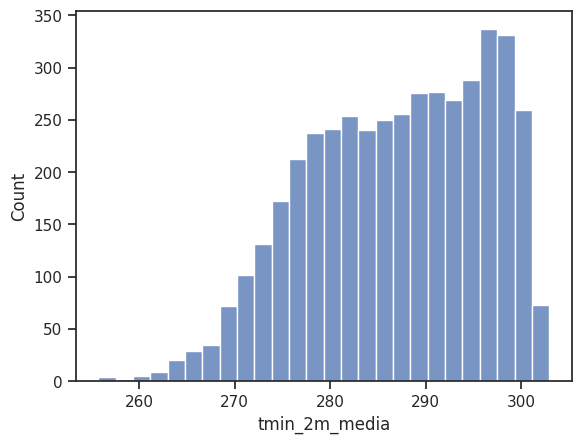

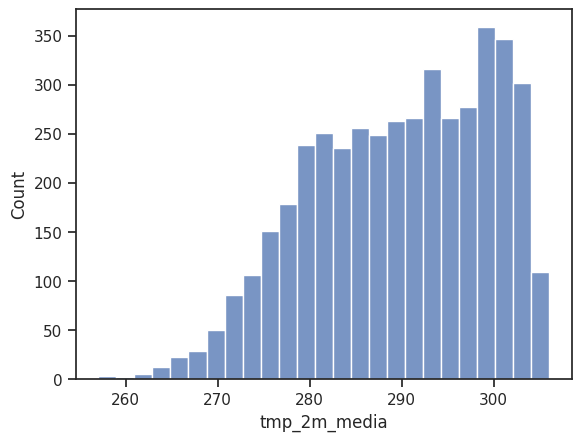

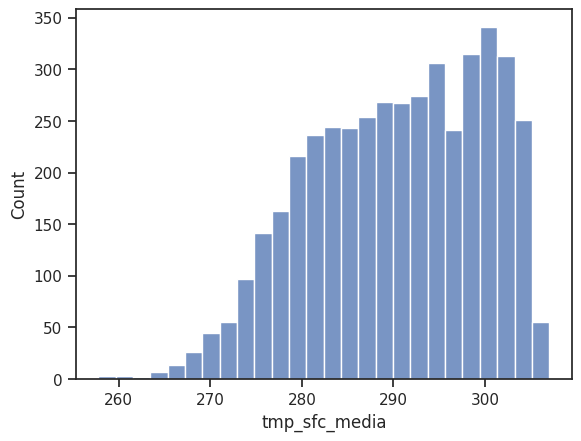

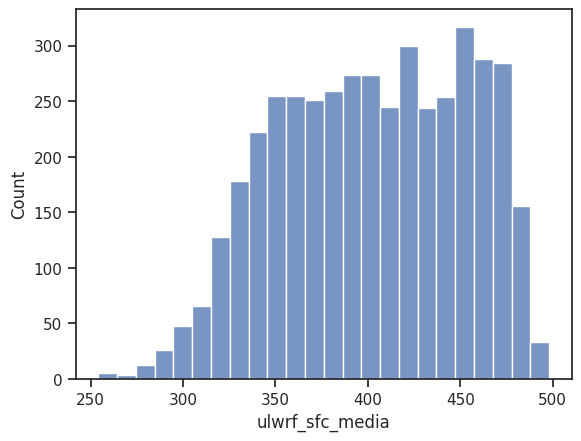

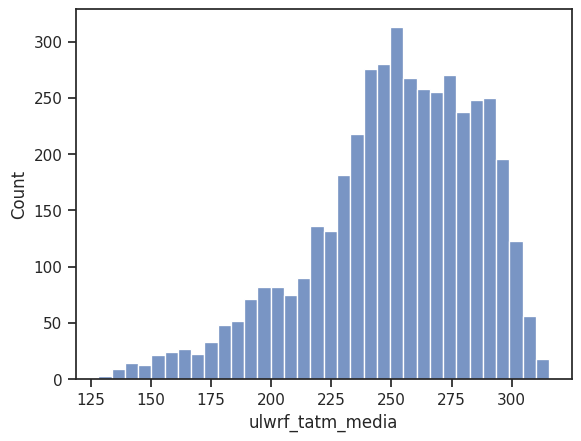

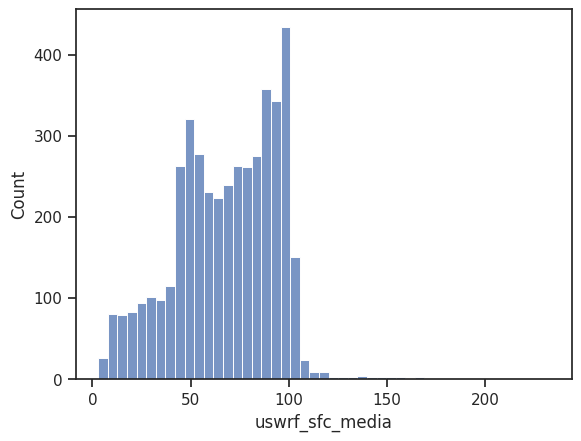

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

# Seleccionar solo las columnas de las variables meteorológicas.
cols = mean_df.columns[:-1]

# Crear un diagrama de cajas para cada variable.
for col in cols:
    sns.histplot(data=mean_df, x=col)
    plt.show()

Ahora, estudiaremos la correlación de los atributos con otros atributos y con la salida.

apcp_sf_media  dlwrf_s_media  dswrf_s_media  pres_msl_media  \
apcp_sf_media          1.000000       0.243991      -0.285869       -0.200707   
dlwrf_s_media          0.243991       1.000000       0.420623       -0.591135   
dswrf_s_media         -0.285869       0.420623       1.000000       -0.206957   
pres_msl_media        -0.200707      -0.591135      -0.206957        1.000000   
pwat_eatm_media        0.303863       0.933142       0.376600       -0.470483   
spfh_2m_media          0.161421       0.943544       0.590196       -0.548867   
tcdc_eatm_media        0.728281       0.160995      -0.499665       -0.126575   
tcolc_eatm_media       0.728395       0.161040      -0.499189       -0.126681   
tmax_2m_media          0.023002       0.892888       0.678890       -0.560968   
tmin_2m_media          0.069626       0.927022       0.632265       -0.583072   
tmp_2m_media           0.028554       0.901355       0.679168       -0.565030   
tmp_sfc_media          0.014947       0.892881       0.699562       -0.548523   
ulwrf_sfc_media        0.023213       0.901651       0.689375       -0.540030   
ulwrf_tatm_media      -0.447643       0.269996       0.652529       -0.156953   
uswrf_sfc_media       -0.336084       0.205893       0.893780       -0.038582   
salida                -0.299093       0.317809       0.884782       -0.158127   

                  pwat_eatm_media  spfh_2m_media  tcdc_eatm_media  \
apcp_sf_media            0.303863       0.161421         0.728281   
dlwrf_s_media            0.933142       0.943544         0.160995   
dswrf_s_media            0.376600       0.590196        -0.499665   
pres_msl_media          -0.470483      -0.548867        -0.126575   
pwat_eatm_media          1.000000       0.913353         0.193609   
spfh_2m_media            0.913353       1.000000         0.000085   
tcdc_eatm_media          0.193609       0.000085         1.000000   
tcolc_eatm_media         0.193714       0.000286         0.999994   
tmax_2m_media            0.797623       0.911637        -0.134641   
tmin_2m_media            0.834233       0.932235        -0.076044   
tmp_2m_media             0.808537       0.921180        -0.124369   
tmp_sfc_media            0.803364       0.916693        -0.142202   
ulwrf_sfc_media          0.815189       0.924047        -0.137022   
ulwrf_tatm_media         0.153237       0.387461        -0.699938   
uswrf_sfc_media          0.193559       0.404520        -0.552105   
salida                   0.246283       0.486372        -0.483169   

                  tcolc_eatm_media  tmax_2m_media  tmin_2m_media  \
apcp_sf_media             0.728395       0.023002       0.069626   
dlwrf_s_media             0.161040       0.892888       0.927022   
dswrf_s_media            -0.499189       0.678890       0.632265   
pres_msl_media           -0.126681      -0.560968      -0.583072   
pwat_eatm_media           0.193714       0.797623       0.834233   
spfh_2m_media             0.000286       0.911637       0.932235   
tcdc_eatm_media           0.999994      -0.134641      -0.076044   
tcolc_eatm_media          1.000000      -0.134418      -0.075842   
tmax_2m_media            -0.134418       1.000000       0.993083   
tmin_2m_media            -0.075842       0.993083       1.000000   
tmp_2m_media             -0.124150       0.998566       0.994799   
tmp_sfc_media            -0.141978       0.996680       0.990974   
ulwrf_sfc_media          -0.136791       0.995381       0.992091   
ulwrf_tatm_media         -0.699517       0.541401       0.493801   
uswrf_sfc_media          -0.551585       0.453303       0.400794   
salida                   -0.482646       0.594110       0.545553   

                  tmp_2m_media  tmp_sfc_media  ulwrf_sfc_media  \
apcp_sf_media         0.028554       0.014947         0.023213   
dlwrf_s_media         0.901355       0.892881         0.901651   
dswrf_s_media         0.679168       0.699562         0.689375   
pres_msl_media       -0.565030      -0.548523

<Axes: >

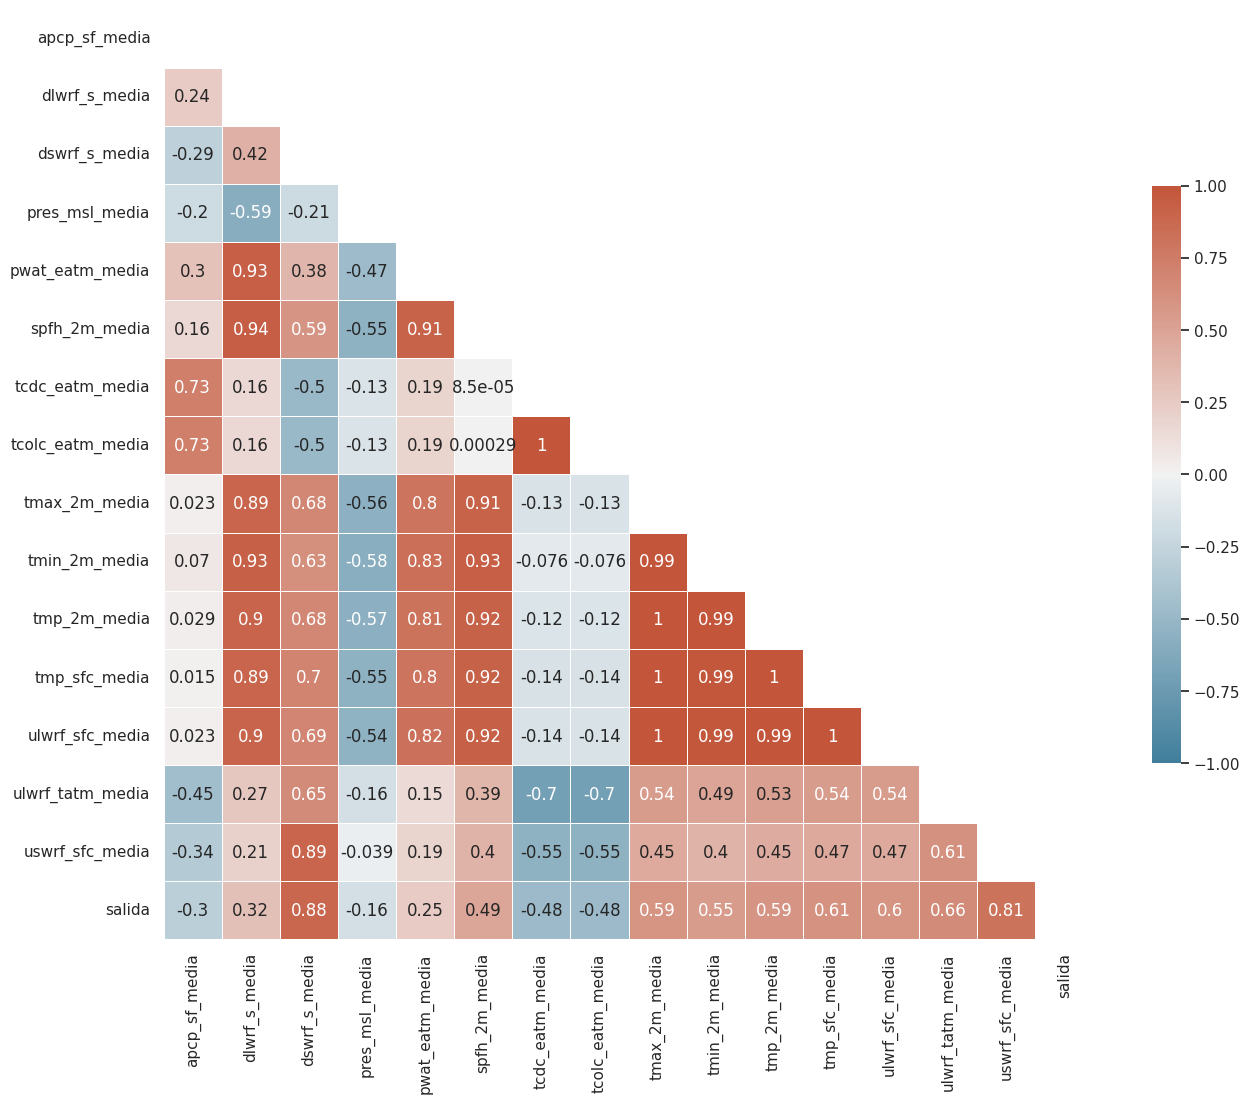

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Cálculo de la matriz de correlación.
corr = mean_df.corr()

print(corr)

# Máscara para el triángulo superior.
mask = np.triu(np.ones_like(corr, dtype=bool))

# Figura matplotlib.
f, ax = plt.subplots(figsize=(15, 15))

# Generación de un mapa de colores divergente personalizado.
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Dibuja el mapa de calor con la máscara y la relación de aspecto correcta.
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


### **Estudio de correlaciones y mejor predictor**

Si analizamos la **correlación** de las variables con la salida, podemos observar que los mejores predictores son `dswrf_s` y `uswrf_sfc` (siendo el mejor `dswrf_s` con una correlación de 0.88).

En cuanto a correlaciones entre variables de entrada observamos:
+ `uswrf_sfc` está fuertemente correalcionada con `dswrf_s`, pero no llega a superar el 0.9.
+ `ulwrf_sfc` está relacionada por encima del 0.9 con `dlwrf_s`, `spfh_2m`, `tmax_2m`, `tmin_2m`, `tmp_2m` y `tmp_sfc`. La correlación supera el 0.99 en los casos de `tmax_2m`, `tmin_2m`, `tmp_2m` y `tmp_sfc`. 
+ `tcolc_eatm` y `tcdc_eatm` tienen una correlación de 1.
+ `spfh_2m` y `dlwrf_s` tienen una correlación de 0.94, a su vez `spfh_2m` y `pwat_eatm` tienen una correlación de 0.91. Además `pwat_eatm` y `dlwrf_s` tienen una correlación de 0.93.

Estrategias:
+ La más clara es eliminar los `tmin_2m`, `tmp_2m`, `tmp_sfc`, `tmax_2m`, y dejar o bien `ulwrf_sfc` y `dlwrf_s`, o bien dejar una de las dos ya que entre ellas están correlacionadas con un 0.9.
+ Podemos observar que lo más lógico sería conservar `dlwrf_s` ya que está correlacionada con `spfh_2m` y `pwat_eatm` y podría representar también a esas dos. 
+ Por último, debemos eliminar o `tcolc_eatm` o `tcdc_eatm` ya que tienen una correlacción de 1.

# **División de datos**
Como se puede ver en el código a continuación, dividiremos los datos de acuerdo con el enunciado establecido. Esto es, utilizaremos los **10 primeros años** del conjunto de datos disponibles para **entrenamiento** (*train*) y los **2 últimos años** para **pruebas** (*test*).</br></br>

Dado que se nos pide que no desordenemos los datos antes de partir en entrenamiento y test para poder respestar el orden temporal, usaremos el parámetro `shuffle = False` al invocar a la función `train_test_split` de Scikit-learn.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Entrenamiento (10 primeros años) y test (2 últimos años).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2/12, random_state=13, shuffle=False)

print("Datos de entrenamiento:", X_train.shape, y_train.shape)   # 3650 días -> 10 años.
print("Datos de test:", X_test.shape, y_test.shape)              # 720 días  ->  2 años.

# Normalizamos los datos.
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_n = scaler.transform(X_train)
X_test_n = scaler.transform(X_test)

scaler = MinMaxScaler()
scaler.fit(y_train.values.reshape(-1, 1))
y_train_n = scaler.transform(y_train.values.reshape(-1, 1))
y_test_n = scaler.transform(y_test.values.reshape(-1, 1))


Datos de entrenamiento:
(3650, 75)
(3650,)

Datos de test:
(730, 75)
(730,)

Como se puede ver y, como hemos explicado anteriormente, dado que los resultados deben ser reproducibles, hemos fijado la **semilla de números aleatorios** en los lugares adecuados. Para ello, hemos seleccionado como semilla el número del grupo de prácticas (*13*) mediante `random_state = 13`.

# **Métodos Básicos**
Para los modelos básicos, consideraremos los siguientes **métodos básicos**:
+ KNN
+ Árboles de regresión
+ Regresión lineal

Además, destacar que las métricas de evaluación son **RMSE** y **MAE**.

## **Evaluación con hiperparámetros por omisión**

Para este paso haremos una nueva división de datos donde cogeremos los dos últimos años para test y los ocho primeros para train; dentro de la propia partición train. Esto generará unos nuevos subconjuntos `train_validation` y `train_train`.

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Volvemos a dividir los datos en entrenamiento y test porque la parttición test solo la usaremos en la evaluación final.
X_train_train, X_train_validation, y_train_train, y_train_validation = train_test_split(X_train, y_train, test_size=2/10, random_state=13, shuffle=False)

# Dividir también los datos normalizados.
X_train_train_n, X_train_validation_n, y_train_train_n, y_train_validation_n = train_test_split(X_train_n, y_train_n, test_size=2/10, random_state=13, shuffle=False)

# Muestra el tamaño de los datos de entrenamiento y test nuevos.
print('Datos train_train: ' , X_train_train.shape, y_train_train.shape)
print('Datos train_test: ' , X_train_validation.shape, y_train_validation.shape)  


Datos train_train: 
(2920, 75)
(2920,)

Datos train_test: 
(730, 75)
(730,)

### **KNN**
Primero entrenaremos un KNN con los **hiperparametros por omisión** y veremos los errores cuadráticos y absolutos medios.

In [18]:
import time

print('\n[bold yellow]KNN\n----[/bold yellow]')

np.random.seed(13)

# [KNN] MODELO BASE.
print('\n[yellow]Modelo base[/yellow]')
base_knn = KNeighborsRegressor()

# Entrenamiento (con medición del tiempo).
start = time.time()
base_knn.fit(X_train_train_n, y_train_train_n)
end = time.time()
time_knn = end - start
print(f'Tiempo de entrenamiento: {time_knn:.5f} segundos.')

# Imprimimos los hiperparámetros del modelo.
print(f'Hiperparámetros: {base_knn.get_params()}')

# Predicciones del conjunto de test.
y_pred_n = base_knn.predict(X_train_validation_n)

# Denormalizar los datos (aunque se podría RMSE y MAE sin denormalizar).
y_pred = scaler.inverse_transform(y_pred_n)

# Cálculo del error cuadrático medio.
rmse_knn = rmse(y_train_validation, y_pred)
print(f'\nRMSE: {rmse_knn}')

# Cálculo del error absoluto medio.
mae_knn = mae(y_train_validation, y_pred)
print(f'MAE: {mae_knn}')

KNN
----

Modelo base

Tiempo de entrenamiento: 0.00108 segundos.

Hiperparámetros: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': 
None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

RMSE: 3439946.258953351

MAE: 2478940.87890411

Ahora usamos, PredefinedSplit para usar **validación cruzada** y evaluar nuestro modelo con este método

In [19]:
from sklearn.model_selection import PredefinedSplit, cross_val_score

print('\n[yellow]Modelo validación cruzada[/yellow]')

# Usar predefined split para la validación cruzada.

# Número de días de entrenamiento y test.
N_train = 8 * 365
N_test = 2 * 365

# Crear el selector de validación cruzada.
selector = [-1] * N_train + [0] * N_test

# Crear el objeto PredefinedSplit.
ps = PredefinedSplit(selector)

# Usar el predefined split para la validación cruzada (con medición del tiempo).
cv_knn = KNeighborsRegressor()

start = time.time()
rmse_knn_cv = cross_val_score(cv_knn, X_train_n, y_train_n, cv=ps, scoring='neg_root_mean_squared_error')
end = time.time()
time1_knn_cv = end - start

start = time.time()
mae_knn_cv = cross_val_score(cv_knn, X_train_n, y_train_n, cv=ps, scoring='neg_mean_absolute_error')
end = time.time()
time2_knn_cv = end - start

# Denormalizar los datos.
rmse_knn_cv = scaler.inverse_transform(rmse_knn_cv.reshape(-1, 1)).ravel()
mae_knn_cv = scaler.inverse_transform(mae_knn_cv.reshape(-1, 1)).ravel()

print(f'Tiempo de entrenamiento (RMSE): {time1_knn_cv:.5f} segundos.')
print(f'Tiempo de entrenamiento (MAE): {time2_knn_cv:.5f} segundos.')
print(f'\nRMSE: {-rmse_knn_cv.mean()}')
print(f'MAE: {-mae_knn_cv.mean()}')

Modelo validación cruzada

Tiempo de entrenamiento (RMSE): 0.13103 segundos.

Tiempo de entrenamiento (MAE): 0.14471 segundos.

RMSE: 2797346.2589533515

MAE: 1836340.87890411

A continuación, definiremos unos **modelos dummy** que nos ayudaran a entender la calidad de nuestros modelos.

In [20]:
from sklearn.dummy import DummyRegressor

print('\n[yellow]Modelos dummy[/yellow]')

dummy_1_knn = DummyRegressor(strategy='mean')
dummy_2_knn = DummyRegressor(strategy='median')

# Entrenamiento de los modelos dummy (con medición del tiempo).
start = time.time()
dummy_1_knn.fit(X_train_train_n, y_train_train_n)
end = time.time()
time_knn_dm1 = end - start

start = time.time()
dummy_2_knn.fit(X_train_train_n, y_train_train_n)
end = time.time()
time_knn_dm2 = end - start

print(f'Tiempo de entrenamiento (mean): {time_knn_dm1:.5f} segundos.')
print(f'Tiempo de entrenamiento (median): {time_knn_dm2:.5f} segundos.')

# Predicciones del conjunto de test.
y_pred_dummy_1_n = dummy_1_knn.predict(X_train_validation_n).reshape(-1, 1)
y_pred_dummy_2_n = dummy_2_knn.predict(X_train_validation_n).reshape(-1, 1)

# Denormalizar los datos (aunque se podría RMSE y MAE sin denormalizar).
y_pred_dummy_1 = scaler.inverse_transform(y_pred_dummy_1_n)
y_pred_dummy_2 = scaler.inverse_transform(y_pred_dummy_2_n)

# Cálculo del error cuadrático medio.
rmse_knn_dm1 = rmse(y_train_validation, y_pred_dummy_1)
rmse_knn_dm2 = rmse(y_train_validation, y_pred_dummy_2)
print(f'\nRMSE (mean): {rmse_knn_dm1}')
print(f'RMSE (median): {rmse_knn_dm2}')

# Cálculo del error absoluto medio.
mae_knn_dm1 = mae(y_train_validation, y_pred_dummy_1)
mae_knn_dm2 = mae(y_train_validation, y_pred_dummy_2)
print(f'MAE (mean): {mae_knn_dm1}')
print(f'MAE (median): {mae_knn_dm2}')

# Relación entre el error del modelo y el error de los modelos dummy.
print(f'\nRMSE dummy (mean)/RMSE KNN: {rmse_knn_dm1/rmse_knn}')
print(f'RMSE dummy (median)/RMSE KNN: {rmse_knn_dm2/rmse_knn}')
print(f'MAE dummy (mean)/MAE KNN: {mae_knn_dm1/mae_knn}')
print(f'MAE dummy (median)/MAE KNN: {mae_knn_dm2/mae_knn}')


Modelos dummy

Tiempo de entrenamiento (mean): 0.00067 segundos.

Tiempo de entrenamiento (median): 0.00203 segundos.

RMSE (mean): 8090772.734467536

RMSE (median): 8103095.185267594

MAE (mean): 7052470.932677802

MAE (median): 7057673.424657534

RMSE dummy (mean)/RMSE KNN: 2.3520055621244675

RMSE dummy (median)/RMSE KNN: 2.3555877258771676

MAE dummy (mean)/MAE KNN: 2.8449532591497535

MAE dummy (median)/MAE KNN: 2.8470519344445155

### **Árboles de regresión**

Primero entrenaremos un árbol de decisión con los **hiperparametros por omisión** y veremos los errores cuadráticos y absolutos medios.

In [21]:
print('\n[bold yellow]Árbol de decisión\n------------------[/bold yellow]')

# [Árbol de decisión] MODELO BASE.
print('\n[yellow]Modelo base[/yellow]')
base_tree = DecisionTreeRegressor()

# Entrenamiento (con medición del tiempo).
start = time.time()
base_tree.fit(X_train_train, y_train_train)
end = time.time()
time_tree = end - start
print(f'Tiempo de entrenamiento: {time_tree:.5f} segundos.')

# Predicciones del conjunto de test.
y_pred = base_tree.predict(X_train_validation)

# Cálculo del error cuadrático medio.
rmse_tree = rmse(y_train_validation, y_pred)
print(f'\nError cuadrático medio del modelo Árbol de decisión: {rmse_tree}')

# Cálculo del error absoluto medio.
mae_tree = mae(y_train_validation, y_pred)
print(f'Error absoluto medio del modelo Árbol de decisión: {mae_tree}')



Árbol de decisión
------------------

Modelo base

Tiempo de entrenamiento: 0.36643 segundos.

Error cuadrático medio del modelo Árbol de decisión: 4569076.711874634

Error absoluto medio del modelo Árbol de decisión: 3170312.5150684933

Ahora usamos, PredefinedSplit para usar **validación cruzada** y evaluar nuestro modelo con este método

In [22]:
print('\n[yellow]Modelo validación cruzada[/yellow]')

# Usar predefined split para la validación cruzada.

'''
print(ps.get_n_splits(X))

for train, valid in ps.split(X):
    print(f'Size of the train set: {train.shape}')
    print(f'Size of the valid set: {valid.shape}')
    print(f'Indices of the train set: {train}')
    print(f'Indices of the valid set: {valid}')
'''

# Usar el predefined split para la validación cruzada (con medición del tiempo).
cv_tree = DecisionTreeRegressor()

start = time.time()
rmse_tree_cv = cross_val_score(cv_tree, X_train, y_train, cv=ps, scoring='neg_root_mean_squared_error')
end = time.time()
time1_tree_cv = end - start

start = time.time()
mae_tree_cv = cross_val_score(cv_tree, X_train, y_train, cv=ps, scoring='neg_mean_absolute_error')
end = time.time()
time2_tree_cv = end - start


print(f'Tiempo de entrenamiento: {time1_tree_cv:.5f} segundos.')
print(f'Tiempo de entrenamiento: {time2_tree_cv:.5f} segundos.')
print(f'\nRMSE: {-rmse_tree_cv.mean()}')
print(f'MAE: {-mae_tree_cv.mean()}')


Modelo validación cruzada

Tiempo de entrenamiento: 0.34692 segundos.

Tiempo de entrenamiento: 0.35361 segundos.

RMSE: 4440967.302640197

MAE: 3223703.419178082

A continuación, compararemos nuestro árbol de decisión con unos **modelos dummy** con estrategias de media y mediana.

In [23]:
print('\n[yellow]Modelos dummy[/yellow]')
dummy_1_tree = DummyRegressor(strategy='mean')
dummy_2_tree = DummyRegressor(strategy='median')

# Entrenamiento de los modelos dummy (con medición del tiempo).
start = time.time()
dummy_1_tree.fit(X_train_train, y_train_train)
end = time.time()
time_tree_dm1 = end - start

start = time.time()
dummy_2_tree.fit(X_train_train, y_train_train)
end = time.time()
time_tree_dm2 = end - start

print(f'Tiempo de entrenamiento (mean): {time_tree_dm1:.5f} segundos.')
print(f'Tiempo de entrenamiento (median): {time_tree_dm2:.5f} segundos.')

# Predicciones del conjunto de test.
y_pred_dummy_1 = dummy_1_tree.predict(X_train_validation)
y_pred_dummy_2 = dummy_2_tree.predict(X_train_validation)

# Cálculo del error cuadrático medio.
rmse_tree_dm1 = rmse(y_train_validation, y_pred_dummy_1)
rmse_tree_dm2 = rmse(y_train_validation, y_pred_dummy_2)  
print(f'\nRMSE (mean): {rmse_tree_dm1}')
print(f'RMSE (median): {rmse_tree_dm2}')

# Cálculo del error absoluto medio.
mae_tree_dm1 = mae(y_train_validation, y_pred_dummy_1)
mae_tree_dm2 = mae(y_train_validation, y_pred_dummy_2)
print(f'MAE (mean): {mae_tree_dm1}')
print(f'MAE (median): {mae_tree_dm2}')

# Relación entre el error del modelo y el error de los modelos dummy.
print(f'\nRMSE dummy (mean)/RMSE tree: {rmse_tree_dm1/rmse_tree}')
print(f'RMSE dummy (median)/RMSE tree: {rmse_tree_dm2/rmse_tree}')
print(f'MAE dummy (mean)/MAE tree: {mae_tree_dm1/mae_tree}')
print(f'MAE dummy (median)/MAE tree: {mae_tree_dm2/mae_tree}')


Modelos dummy

Tiempo de entrenamiento (mean): 0.00075 segundos.

Tiempo de entrenamiento (median): 0.00061 segundos.

RMSE (mean): 8090772.734467536

RMSE (median): 8103095.185267594

MAE (mean): 7052470.932677801

MAE (median): 7057673.424657534

RMSE dummy (mean)/RMSE tree: 1.7707675411621608

RMSE dummy (median)/RMSE tree: 1.7734644647590074

MAE dummy (mean)/MAE tree: 2.2245349312275717

MAE dummy (median)/MAE tree: 2.2261759341113585

### **Regresión lineal**

Primero entrenaremos un modelo de regresión lineal con los **hiperparametros por omisión** y veremos los errores cuadráticos y absolutos medios.

In [24]:
print('\n[bold yellow]Regresión lineal\n------------------[/bold yellow]')

# [Regresión lineal] MODELO BASE.
print('\n[yellow]Modelo base[/yellow]')
base_linear = LinearRegression()

# Entrenamiento (con medición del tiempo).
start = time.time()
base_linear.fit(X_train_train_n, y_train_train_n)
end = time.time()
time_linear = end - start
print(f'Tiempo de entrenamiento: {time_linear:.5f} segundos.')

# Predicciones del conjunto de test.
y_pred_n = base_linear.predict(X_train_validation_n)

# Denormalizar los datos.
y_pred = scaler.inverse_transform(y_pred_n)

# Cálculo del error cuadrático medio.
rmse_linear = rmse(y_train_validation, y_pred)
print(f'\nRMSE: {rmse_linear}')

# Cálculo del error absoluto medio.
mae_linear = mae(y_train_validation, y_pred)
print(f'MAE: {mae_linear}')

Regresión lineal
------------------

Modelo base

Tiempo de entrenamiento: 0.05172 segundos.

RMSE: 2914992.7582885786

MAE: 2143275.4134048363

Ahora usamos, PredefinedSplit para usar **validación cruzada** y evaluar nuestro modelo con este método

In [25]:
print('\n[yellow]Modelo validación cruzada[/yellow]')

'''
print(ps.get_n_splits(X))

for train, valid in ps.split(X):
    print(f'Size of the train set: {train.shape}')
    print(f'Size of the valid set: {valid.shape}')
    print(f'Indices of the train set: {train}')
    print(f'Indices of the valid set: {valid}')
'''

# Usar el predefined split para la validación cruzada.
cv_linear = LinearRegression()

start = time.time()
rmse_linear_cv = cross_val_score(cv_linear, X_train_n, y_train_n, cv=ps, scoring='neg_root_mean_squared_error')
end = time.time()
time1_linear_cv = end - start

start = time.time()
mae_linear_cv = cross_val_score(cv_linear, X_train_n, y_train_n, cv=ps, scoring='neg_mean_absolute_error')
end = time.time()
time2_linear_cv = end - start

# Denormalizar los datos.
rmse_linear_cv = scaler.inverse_transform(rmse_linear_cv.reshape(-1, 1)).ravel()
mae_linear_cv = scaler.inverse_transform(mae_linear_cv.reshape(-1, 1)).ravel()

print(f'Tiempo de entrenamiento (RMSE): {time1_linear_cv:.5f} segundos.')
print(f'Tiempo de entrenamiento (MAE): {time2_linear_cv:.5f} segundos.')
print(f'\nRMSE: {-rmse_linear_cv.mean()}')
print(f'MAE: {-mae_linear_cv.mean()}')


Modelo validación cruzada

Tiempo de entrenamiento (RMSE): 0.06634 segundos.

Tiempo de entrenamiento (MAE): 0.09703 segundos.

RMSE: 2272392.7582885786

RMSE: 1500675.413404837

A continuación, compararemos nuestro modeo con unos **modelos dummy** con estrategias de media y mediana.

In [26]:
print('\n[yellow]Modelos dummy[/yellow]')
dummy_1_linear = DummyRegressor(strategy='mean')
dummy_2_linear = DummyRegressor(strategy='median')

# Entrenamiento de los modelos dummy (con medición del tiempo).
start = time.time()
dummy_1_linear.fit(X_train_train_n, y_train_train_n)
end = time.time()
time_linear_dm1 = end - start

start = time.time()
dummy_2_linear.fit(X_train_train_n, y_train_train_n)
end = time.time()
time_linear_dm2 = end - start

print(f'Tiempo de entrenamiento (mean): {time_linear_dm1:.5f} segundos.')
print(f'Tiempo de entrenamiento (median): {time_linear_dm2:.5f} segundos.')

# Predicciones del conjunto de test.
y_pred_dummy_1_n = dummy_1_linear.predict(X_train_validation_n).reshape(-1, 1)
y_pred_dummy_2_n = dummy_2_linear.predict(X_train_validation_n).reshape(-1, 1)

# Denormalizar los datos.
y_pred_dummy_1 = scaler.inverse_transform(y_pred_dummy_1_n)
y_pred_dummy_2 = scaler.inverse_transform(y_pred_dummy_2_n)

# Cálculo del error cuadrático medio.
rmse_linear_dm1 = rmse(y_train_validation, y_pred_dummy_1)
rmse_linear_dm2 = rmse(y_train_validation, y_pred_dummy_2)
print(f'\nRMSE (mean): {rmse_linear_dm1}')
print(f'RMSE (median): {rmse_linear_dm2}')

# Cálculo del error absoluto medio.
mae_linear_dm1 = mae(y_train_validation, y_pred_dummy_1)
mae_linear_dm2 = mae(y_train_validation, y_pred_dummy_2)
print(f'MAE (mean): {mae_linear_dm1}')
print(f'MAE (median): {mae_linear_dm2}')

# Cálculo de la diferencia entre el error de los modelos dummy y el modelo base.
print(f'\nRMSE dummy (mean)/RMSE linear: {rmse_linear_dm1/rmse_linear}')
print(f'RMSE dummy (median)/RMSE linear: {rmse_linear_dm2/rmse_linear}')
print(f'MAE dummy (mean)/MAE linear: {mae_linear_dm1/mae_linear}')
print(f'MAE dummy (median)/MAE linear: {mae_linear_dm2/mae_linear}')


Modelos dummy

Tiempo de entrenamiento (mean): 0.00198 segundos.

Tiempo de entrenamiento (median): 0.00051 segundos.

RMSE (mean): 8090772.734467536

RMSE (median): 8103095.185267594

MAE (mean): 7052470.932677802

MAE (median): 7057673.424657534

RMSE dummy (mean)/RMSE linear: 2.77557215586968

RMSE dummy (median)/RMSE linear: 2.779799422220521

MAE dummy (mean)/MAE linear: 3.290510817494123

MAE dummy (median)/MAE linear: 3.292938173281995

## **Ajuste de hiperparámetros**

En este paso, utilizaremos el **PredefinedSplit** para hacer **GridSearch** en los diferentes métodos y encontrar los mejores hiperparametros para cada modelo. Además, utilizaremos **RandomizedSearch** y seleccionaremos el que tenga menos MAE. Utilizar RamdomizedSearch nos servirá para poder introducir mayores cantidades de hiperparametros a evaluar sin resentir el tiempo de ejecución, eventualmente encontraremos mejores resultados utilizando esta técnica.

### **KNN**

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

print('\n[bold blue]KNN\n----[/bold blue]')

print('\n[yellow]Grid Search[/yellow]\n')

# Usaremos grid search para encontrar los mejores hiperparámetros haciendo antes predefined split.

# Definimos el diccionario de los valores de los hiperparámetros que queremos probar.
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'leaf_size': [1, 2, 5, 10, 20, 30, 40],
    'p':[1, 2]
}

# Definimos el modelo.
model = KNeighborsRegressor()

# Definimos el grid search.
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=ps,
                    scoring='neg_mean_absolute_error',
                    verbose=1,
                    n_jobs=-1)

# Entrenamos el grid search.
start = time.time()
grid_result = grid.fit(X_train_n, y_train_n)
end = time.time()
time_knn_gs = end - start
print(f'\nTiempo búsqueda hiperparámetros (Grid Search): {time_knn_gs:.5f} segundos.')

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {grid_result.best_params_}')

# Definir modelo KNN con los mejores hiperparámetros
model = KNeighborsRegressor(n_neighbors=grid_result.best_params_['n_neighbors'],
                            weights=grid_result.best_params_['weights'],
                            p=grid_result.best_params_['p'],
                            metric=grid_result.best_params_['metric'],
                            leaf_size=grid_result.best_params_['leaf_size'])

# Entrenamos modelo con datos de entrenamiento normalizados.
start = time.time()
model.fit(X_train_train_n, y_train_train_n)
end = time.time()
time_knn_gs_a = end - start
print(f'\nTiempo de entrenamiento (Hiperparámetros ajustados): {time_knn_gs_a:.5f} segundos.')

# Hacer predicciones en los datos de validación normalizados.
y_pred_n = model.predict(X_train_validation_n)

# Desnormalizar las predicciones.
y_pred = scaler.inverse_transform(y_pred_n)

# Calcular el error cuadrático medio en la escala original.
rmse_knn_gs_a = rmse(y_train_validation, y_pred)
print(f'\nRMSE: {rmse_knn_gs_a}')

# Calcular el error absoluto medio en la escala original.
mae_knn_gs_a = mae(y_train_validation, y_pred)
print(f'MAE: {mae_knn_gs_a}\n')

# Ahora, usaremos randomized search para comparar resultados con grid search.
print('[yellow]Randomized Search[/yellow]\n')

# Definimos el diccionario de los valores de los hiperparámetros que queremos probar (más combinaciones).
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'leaf_size': list(range(1,100)),
    'p':[1, 2]
}

r_search = RandomizedSearchCV(estimator=model,
                              param_distributions=param_grid,
                              cv=ps,
                              scoring='neg_mean_absolute_error',
                              verbose=1,
                              n_jobs=-1,
                              n_iter=100)


# Entrenamos el randomized search.
start = time.time()
r_search_result = r_search.fit(X_train_n, y_train_n)
end = time.time()
time_knn_rs = end - start
print(f'\nTiempo búsqueda hiperparámetros (Randomized Search): {time_knn_rs:.5f} segundos.')

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {r_search_result.best_params_}')

# Definir modelo KNN con los mejores hiperparámetros
model = KNeighborsRegressor(n_neighbors=r_search_result.best_params_['n_neighbors'],
                            weights=r_search_result.best_params_['weights'],
                            p=r_search_result.best_params_['p'],
                            metric=r_search_result.best_params_['metric'],
                            leaf_size=r_search_result.best_params_['leaf_size'])

# Entrenamos modelo con datos de entrenamiento normalizados.
start = time.time()
model.fit(X_train_train_n, y_train_train_n)
end = time.time()
time_knn_rs_a = end - start
print(f'\nTiempo de entrenamiento (Hiperparámetros ajustados): {time_knn_rs_a:.5f} segundos.')

# Hacer predicciones en los datos de prueba normalizados.
y_pred_n = model.predict(X_train_validation_n)

# Desnormalizar las predicciones.
y_pred = scaler.inverse_transform(y_pred_n)

# Calcular el error cuadrático medio en la escala original.
rmse_knn_rs_a = rmse(y_train_validation, y_pred)
print(f'\nRMSE: {rmse_knn_rs_a}')

# Calcular el error absoluto medio en la escala original.
mae_knn_rs_a = mae(y_train_validation, y_pred)
print(f'MAE: {mae_knn_rs_a}')


# Seleccionamos los menore errores (entre grid search y randomized search).
mae_knn_a = min(mae_knn_gs_a, mae_knn_rs_a)

if mae_knn_a == mae_knn_gs_a:
    rmse_knn_a = rmse_knn_gs_a
    print("GridSearch seleccionado.")
else:
    rmse_knn_a = rmse_knn_rs_a
    print("RandomizedSearch seleccionado.")



KNN
----

Grid Search

Fitting 1 folds for each of 672 candidates, totalling 672 fits


Tiempo búsqueda hiperparámetros (Grid Search): 74.83974 segundos.

Mejores hiperparámetros: {'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}

Tiempo de entrenamiento (Hiperparámetros ajustados): 0.00305 segundos.

RMSE: 3349726.2813777477

MAE: 2417221.600297992

Randomized Search

Fitting 1 folds for each of 100 candidates, totalling 100 fits


Tiempo búsqueda hiperparámetros (Randomized Search): 8.96784 segundos.

Mejores hiperparámetros: {'weights': 'distance', 'p': 1, 'n_neighbors': 15, 'metric': 'manhattan', 'leaf_size': 1}

Tiempo de entrenamiento (Hiperparámetros ajustados): 0.00070 segundos.

RMSE: 3201786.090578021

MAE: 2328954.693791461

RandomizedSearch seleccionado.

En este caso en particular, podemos observar como obtenemos mejores resultados con Ranromized Search además de que el tiempo es menor.

### **Árboles de regresión**

In [28]:
print('\n[bold blue]Árbol de decisión\n------------------[/bold blue]')

print('\n[yellow]Grid Search[/yellow]\n')

# Usaremos grid search para encontrar los mejores hiperparámetros haciendo antes predefined split.

# Definimos el diccionario de los valores de los hiperparámetros que queremos probar.
param_grid = {
    'max_depth': [1, 2, 5, 8, 10, 15, 20, 40],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 5, 8, 10, 15, 20, 40],
}

# Definimos el modelo.
model = DecisionTreeRegressor()

# Definimos el grid search.
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=ps,
                    scoring='neg_mean_absolute_error',
                    verbose=1,
                    n_jobs=-1)

# Entrenamos el grid search.
start = time.time()
grid_result = grid.fit(X_train, y_train)
end = time.time()
time_tree_gs = end - start
print(f'\nTiempo búsqueda hiperparámetros (Grid Search): {time_tree_gs:.5f} segundos.')

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {grid_result.best_params_}')

# Definir modelo Árbol de Regresión con los mejores hiperparámetros
model = DecisionTreeRegressor(max_depth=grid_result.best_params_['max_depth'],
                              min_samples_split=grid_result.best_params_['min_samples_split'],
                              min_samples_leaf=grid_result.best_params_['min_samples_leaf'])

# Entrenamos modelo con datos de entrenamiento.
start = time.time()
model.fit(X_train_train, y_train_train)
end = time.time()
time_tree_gs_a = end - start
print(f'\nTiempo de entrenamiento (Hiperparámetros ajustados): {time_tree_gs_a:.5f} segundos.')

# Hacer predicciones en los datos de validación.
y_pred = model.predict(X_train_validation)

# Calcular el error cuadrático medio en la escala original.
rmse_tree_gs_a = rmse(y_train_validation, y_pred)
print(f'\nRMSE: {rmse_tree_gs_a}')

# Calcular el error absoluto medio en la escala original.
mae_tree_gs_a = mae(y_train_validation, y_pred)
print(f'MAE: {mae_tree_gs_a}\n')


# Ahora, usaremos randomized search para comparar resultados con grid search.
print('[yellow]Randomized Search[/yellow]\n')

# Definimos el diccionario de los valores de los hiperparámetros que queremos probar (más combinaciones).
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50],
}

# Ahora, usaremos random search para comparar resultados con grid search.
r_search = RandomizedSearchCV(estimator=model,
                              param_distributions=param_grid,
                              cv=ps,
                              scoring='neg_mean_absolute_error',
                              verbose=1,
                              n_jobs=-1,
                              n_iter=100)

# Entrenamos el grid search.
start = time.time()
r_search_result = r_search.fit(X_train, y_train)
end = time.time()
time_tree_rs = end - start
print(f'\nTiempo búsqueda hiperparámetros (Randomized Search): {time_tree_rs:.5f} segundos.')

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {r_search_result.best_params_}')

# Definir modelo Árbol de Regresión con los mejores hiperparámetros
model = DecisionTreeRegressor(max_depth=r_search_result.best_params_['max_depth'],
                              min_samples_split=r_search_result.best_params_['min_samples_split'],
                              min_samples_leaf=r_search_result.best_params_['min_samples_leaf'])

# Entrenamos modelo con datos de entrenamiento.
start = time.time()
model.fit(X_train_train, y_train_train)
end = time.time()
time_tree_rs_a = end - start
print(f'\nTiempo de entrenamiento (Hiperparámetros ajustados): {time_tree_rs_a:.5f} segundos.')

# Hacer predicciones en los datos de validación.
y_pred = model.predict(X_train_validation)

# Calcular el error cuadrático medio en la escala original.
rmse_tree_rs_a = rmse(y_train_validation, y_pred)
print(f'\nRMSE: {rmse_tree_rs_a}')

# Calcular el error absoluto medio en la escala original.
mae_tree_rs_a = mae(y_train_validation, y_pred)
print(f'MAE: {mae_tree_rs_a}\n')


# Seleccionamos los menore errores (entre grid search y randomized search).
mae_tree_a = min(mae_tree_gs_a, mae_tree_rs_a)

if mae_tree_a == mae_tree_gs_a:
    rmse_tree_a = rmse_tree_gs_a
    print("GridSearch seleccionado.")
else:
    rmse_tree_a = rmse_tree_rs_a
    print("RandomizedSearch seleccionado.")


Árbol de decisión
------------------

Grid Search

Fitting 1 folds for each of 576 candidates, totalling 576 fits


Tiempo búsqueda hiperparámetros (Grid Search): 38.82057 segundos.

Mejores hiperparámetros: {'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 3}

Tiempo de entrenamiento (Hiperparámetros ajustados): 0.10604 segundos.

RMSE: 3422340.28546764

MAE: 2470632.610462104

Randomized Search

Fitting 1 folds for each of 100 candidates, totalling 100 fits


Tiempo búsqueda hiperparámetros (Randomized Search): 6.49697 segundos.

Mejores hiperparámetros: {'min_samples_split': 45, 'min_samples_leaf': 30, 'max_depth': 6}

Tiempo de entrenamiento (Hiperparámetros ajustados): 0.09256 segundos.

RMSE: 3481927.0752000273

MAE: 2517083.33107137

GridSearch seleccionado.

En este caso, los resultados obtenidos con Randomized Search son peores que los de Grid Search a pesar de tardar casi 6 veces menos.

### **Regresión lineal**

In [29]:
print('\n[bold blue]Regresión lineal\n------------------[/bold blue]')

print('\n[yellow]Grid Search[/yellow]\n')

# Usaremos grid search para encontrar los mejores hiperparámetros haciendo antes predefined split.

# Definimos el diccionario de los valores de los hiperparámetros que queremos probar.
param_grid = {
    'fit_intercept':  [True, False],
    'positive': [True, False],
}

# Definimos el modelo.
model = LinearRegression()

# Definir la estrategia de validación cruzada
#cv = TimeSeriesSplit(n_splits=3)

# Definimos el grid search.
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=ps,
                    scoring='neg_mean_absolute_error',
                    verbose=1,
                    n_jobs=-1)

# Entrenamos el grid search.
start = time.time()
grid_result = grid.fit(X_train_n, y_train_n)
end = time.time()
time_linear_gs = end - start
print(f'\nTiempo búsqueda hiperparámetros (Grid Search): {time_linear_gs:.5f} segundos.')

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {grid_result.best_params_}')

# Definir modelo Regresión Linear con los mejores hiperparámetros
model = LinearRegression(fit_intercept=grid_result.best_params_['fit_intercept'],
                         positive=grid_result.best_params_['positive'])

# Entrenamos modelo con datos de entrenamiento normalizados.
start = time.time()
model.fit(X_train_train_n, y_train_train_n)
end = time.time()
time_linear_gs_a = end - start
print(f'\nTiempo de entrenamiento (Hiperparámetros ajustados): {time_linear_gs_a:.5f} segundos.')

# Hacer predicciones en los datos de validación normalizados.
y_pred_n = model.predict(X_train_validation_n)

# Desnormalizar las predicciones.
y_pred = scaler.inverse_transform(y_pred_n)

# Calcular el error cuadrático medio en la escala original.
rmse_linear_gs_a = rmse(y_train_validation, y_pred)
print(f'\nRMSE: {rmse_linear_gs_a}')

# Calcular el error absoluto medio en la escala original.
mae_linear_gs_a = mae(y_train_validation, y_pred)
print(f'MAE: {mae_linear_gs_a}\n')


# Ahora, usaremos random search para comparar resultados con grid search.
print('[yellow]Randomized Search[/yellow]\n')

# -Usaremos el mismo diccionario de hiperparámetros que en grid search.

r_search = RandomizedSearchCV(estimator=model,
                              param_distributions=param_grid,
                              cv=ps,
                              scoring='neg_mean_absolute_error',
                              verbose=1,
                              n_jobs=-1,
                              n_iter=4)

# Entrenamos el grid search.
start = time.time()
r_search_result = r_search.fit(X_train_n, y_train_n)
end = time.time()
time_linear_rs = end - start
print(f'\nTiempo búsqueda hiperparámetros (Randomized Search): {time_linear_rs:.5f} segundos.')

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {r_search_result.best_params_}')

# Definir modelo Regresión Linear con los mejores hiperparámetros
model = LinearRegression(fit_intercept=r_search_result.best_params_['fit_intercept'],
                         positive=r_search_result.best_params_['positive'])

# Entrenamos modelo con datos de entrenamiento normalizados.
start = time.time()
model.fit(X_train_train_n, y_train_train_n)
end = time.time()
time_linear_rs_a = end - start
print(f'\nTiempo de entrenamiento (Hiperparámetros ajustados): {time_linear_rs_a:.5f} segundos.')

# Hacer predicciones en los datos de validación normalizados.
y_pred_n = model.predict(X_train_validation_n)

# Desnormalizar las predicciones.
y_pred = scaler.inverse_transform(y_pred_n)

# Calcular el error cuadrático medio en la escala original.
rmse_linear_rs_a = rmse(y_train_validation, y_pred)
print(f'\nRMSE: {rmse_linear_rs_a}')

# Calcular el error absoluto medio en la escala original.
mae_linear_rs_a = mae(y_train_validation, y_pred)
print(f'MAE: {mae_linear_rs_a}\n')


# Seleccionamos los menore errores (entre grid search y randomized search).
mae_linear_a = min(mae_linear_gs_a, mae_linear_rs_a)

if mae_linear_a == mae_linear_gs_a:
    rsme_linear_a = rmse_linear_gs_a
    print("GridSearch seleccionado.")
else:
    rsme_linear_a = rmse_linear_rs_a
    print("RandomizedSearch seleccionado.")


Regresión lineal
------------------

Grid Search

Fitting 1 folds for each of 4 candidates, totalling 4 fits


Tiempo búsqueda hiperparámetros (Grid Search): 0.15209 segundos.

Mejores hiperparámetros: {'fit_intercept': True, 'positive': False}

Tiempo de entrenamiento (Hiperparámetros ajustados): 0.01249 segundos.

RMSE: 2914992.7582885786

MAE: 2143275.4134048363

Randomized Search

Fitting 1 folds for each of 4 candidates, totalling 4 fits


Tiempo búsqueda hiperparámetros (Randomized Search): 0.19347 segundos.

Mejores hiperparámetros: {'positive': False, 'fit_intercept': True}

Tiempo de entrenamiento (Hiperparámetros ajustados): 0.01146 segundos.

RMSE: 2914992.7582885786

MAE: 2143275.4134048363

GridSearch seleccionado.

En este caso, ambos resultados son idénticos debido a las pocas combinaciones de hiperparámetros que tenemos.

## **Comparativa de errores** 

En este apartado, comparamos los **errores** de los métodos básicos con los **hiperparámetros por omisión** y con los **hiperparámetros ajustados**.

In [30]:
print('[bold red]' + '-' * 60 +'\nComparación de modelos simples y resultados.\n' + '-' * 60 + '[/bold red]')

# KNN.
print('\n[bold green]KNN\n----[/bold green]')

print('MAE sin ajustar:', mae_knn)
print('MAE ajustado:', mae_knn_a)
print('MAE ratio KNN/knn_adjusted:', mae_knn/mae_knn_a)
print(f'\nMAE dummy (mean)/MAE KNN: {mae_knn_dm1/mae_knn_a}')
print(f'MAE dummy (median)/MAE KNN: {mae_knn_dm2/mae_knn_a}')

print('\nRMSE sin ajustar:', rmse_knn)
print('RMSE ajustado:', rmse_knn_a)
print('RMSE ratio KNN/knn_adjusted:', rmse_knn/rmse_knn_a)
print(f'\nRMSE dummy (mean)/RMSE KNN: {rmse_knn_dm1/rmse_knn_a}')
print(f'RMSE dummy (median)/RMSE KNN: {rmse_knn_dm2/rmse_knn_a}')


# Arbol de decisión.
print('\n[bold green]Árbol de decisión\n------------------[/bold green]')

print('MAE sin ajustar:', mae_tree)
print('MAE ajustado:', mae_tree_a)
print('MAE ratio tree/tree_adjusted:', mae_tree/mae_tree_a)
print(f'\nMAE dummy (mean)/MAE tree: {mae_tree_dm1/mae_tree_a}')
print(f'MAE dummy (median)/MAE tree: {mae_tree_dm2/mae_tree_a}')

print('\nRMSE sin ajustar:', rmse_tree)
print('RMSE ajustado:', rmse_tree_a)
print('RMSE ratio tree/tree_adjusted:', rmse_tree/rmse_tree_a)
print(f'\nRMSE dummy (mean)/RMSE tree: {rmse_tree_dm1/rmse_tree_a}')
print(f'RMSE dummy (median)/RMSE tree: {rmse_tree_dm2/rmse_tree_a}')


# Regresión lineal.
print('\n[bold green]Regresión lineal\n------------------[/bold green]')

print('MAE sin ajustar:', mae_linear)
print('MAE ajustado:', mae_linear_a)
print('MAE ratio linear/linear_adjusted:', mae_linear/mae_linear_a)
print(f'\nMAE dummy (mean)/MAE linear: {mae_linear_dm1/mae_linear_a}')
print(f'MAE dummy (median)/MAE linear: {mae_linear_dm2/mae_linear_a}')

print('\nRMSE sin ajustar:', rmse_linear)
print('RMSE ajustado:',rsme_linear_a)
print('RMSE ratio linear/linear_adjusted:', rmse_linear/rsme_linear_a)
print(f'\nRMSE dummy (mean)/RMSE linear: {rmse_linear_dm1/rsme_linear_a}')
print(f'RMSE dummy (median)/RMSE linear: {rmse_linear_dm2/rsme_linear_a}\n')

------------------------------------------------------------
Comparación de modelos simples y resultados.
------------------------------------------------------------

KNN
----

MAE sin ajustar: 2478940.87890411

MAE ajustado: 2328954.693791461

MAE ratio KNN/knn_adjusted: 1.0644006452819725

MAE dummy (mean)/MAE KNN: 3.028170084836048

MAE dummy (median)/MAE KNN: 3.0304039161740306

RMSE sin ajustar: 3439946.258953351

RMSE ajustado: 3201786.090578021

RMSE ratio KNN/knn_adjusted: 1.0743835352012334

RMSE dummy (mean)/RMSE KNN: 2.5269560506482502

RMSE dummy (median)/RMSE KNN: 2.5308046684045453

Árbol de decisión
------------------

MAE sin ajustar: 3170312.5150684933

MAE ajustado: 2470632.610462104

MAE ratio tree/tree_adjusted: 1.2831986842736292

MAE dummy (mean)/MAE tree: 2.854520296871948

MAE dummy (median)/MAE tree: 2.8566260296133126

RMSE sin ajustar: 4569076.711874634

RMSE ajustado: 3422340.28546764

RMSE ratio tree/tree_adjusted: 1.33507375969491

RMSE dummy (mean)/RMSE tree: 2.3641052787250776

RMSE dummy (median)/RMSE tree: 2.3677058706511294

Regresión lineal
------------------

MAE sin ajustar: 2143275.4134048363

MAE ajustado: 2143275.4134048363

MAE ratio linear/linear_adjusted: 1.0

MAE dummy (mean)/MAE linear: 3.290510817494123

MAE dummy (median)/MAE linear: 3.292938173281995

RMSE sin ajustar: 2914992.7582885786

RMSE ajustado: 2914992.7582885786

RMSE ratio linear/linear_adjusted: 1.0

RMSE dummy (mean)/RMSE linear: 2.77557215586968

RMSE dummy (median)/RMSE linear: 2.779799422220521

## **Conclusiones métodos básicos**
Para las conclusiones utilizaremos como referencia el **MAE** y el **tiempo de ejecución** en segundos. Podemos observar que el mejor método es usar un modelo de regresión lineal sin ajuste de hiperparámetros (ya que con ajuste no varía), donde se obtiene un error de 2.143.275 de energía solar. 
<br><br>
Aunque este método no es el más rápido, ya que el que menos tiempo consume para entrenarse es KNN. Sin embargo KNN es aproximadamente un 15% peor sin ajustar hiperparametros y un 8% peor en su versión ajustada. Sin embargo, con los datos que tenemos los tiempos en los métodos básicos no son grandes y podemos obviar el tiempo de entrenamiento ya que en ambos es menor de un segundo.
<br><br>
Si lo comparamos con el árbol de decisión, la mejora es más significativa en cuanto a tiempo y precisión; concretamente el modelo de regresión lineal es un 47% mejor que el árbol de decisión sin ajustar y un 15% mejor que la versión ajustada.
<br><br>
Donde sí que encontramos problemas en los métodos básicos es con los tiempos en el ajuste de hiperparametros. En esta sección hemos tenido que hacer varias ejecuciones para afinar los hiperparametros y no sobresaturar el procesamiento ya que los tiempos al tener que evaluar cientos de modelos con GridSearch si que eran más elevados. Para poder incluir un mayor rango de valores hemos implementado la sección de RandomSearch que eventualmente nos otorgará mejores resultados en un menor tiempo. Al final de cada ajuste seleccionamos el menor error para poder hacer las comparaciones correctamente.
<br><br>
En cuanto a la mejora con el ajuste de hiperparametros hemos observado que para KNN la mejora es de aproximadamente del 6% y para árboles de decisión es de 28% como ya hemos comentado. Queda comentar que para regresión lineal no es relevante ya que solo hay dos hiperparametros booleanos que ajustar y la mejora es del 0%. Por tanto, podemos concluir que el modelo donde más importante ha sido ajustar los hiperparametros son los árboles de decisión.
<br><br>
Además, podemos observar que en cuanto a tiempos de entrenamiento efectivamente RandomSearch al entrenar menos modelos es más rápido. KNN y árbol de decisión son métodos que no nos ha convenido sobresaturar en cuanto a número de hiperparametros ya que el tiempo acumulado de entrenar tantos modelos es significante, por ello solo hemos ajustado los principales y más influyentes. Este tiempo que requiere el ajuste consideramos que es rentable para árboles de decisión pero no para KNN, por sus ratios de mejora.
<br><br>
En comparación con modelos dummy, vemos que todos los modelos con y sin ajuste de hiperparámetros muestran una mejora de entre el 200-300%. En las sección de comparación de resultados se encuentran los ratios de mejora detallados por modelos. Esta observación es un indicativo de que vamos por el buen camino y de que nuestros modelos, pese a ser básicos y tener bastante error, ya predicen mejor que los más triviales.
<br><br>
Por último, podemos afirmar que el mejor modelo es regresión lineal ya que es el mejor en cuanto a precisión y no requiere de ajuste de hiperparametros; todo ello sumado a su rapidez nos hace poder asegurar que en nuestro estudio este es el mejor modelo básico. 


## **Reducción de dimensionalidad** 

Primero, vamos a crear un nuevo dataframe con los datos reducidos y crearemos las nuevas particiones para realizar nuestros cáclulos.

In [31]:
print('[bold red]' + '-' * 60 +'\nReducción de dimensionalidad.\n' + '-' * 60 + '[/bold red]')

# Quitamos del dataframe de las medias de las variables que no queremos usar.

'''Alternativa 1'''
#df_reducida=mean_df
'''Alternativa 2'''
df_reducida = mean_df.drop(['apcp_sf_media', 'pres_msl_media', 'tcdc_eatm_media', 'tcolc_eatm_media'], axis=1)
'''Alternativa 3'''
#df_reducida = mean_df.drop(['tmin_2m_media', 'tmp_2m_media', 'tmp_sfc_media', 'tmax_2m_media', 'tcolc_eatm_media', 'spfh_2m_media', 'pwat_eatm_media'], axis=1)
'''Alternativa 4'''
#df_reducida=disp_df.drop(['tmin_2m1_1', 'tmin_2m2_1', 'tmin_2m3_1', 'tmin_2m4_1', 'tmin_2m5_1', 'tmp_2m_1_1', 'tmp_2m_2_1', 'tmp_2m_3_1', 'tmp_2m_4_1', 'tmp_2m_5_1', 'tmp_sfc1_1', 'tmp_sfc2_1', 'tmp_sfc3_1', 'tmp_sfc4_1', 'tmp_sfc5_1', 'tmax_2m1_1', 'tmax_2m2_1', 'tmax_2m3_1', 'tmax_2m4_1', 'tmax_2m5_1', 'tcolc_e1_1', 'tcolc_e2_1', 'tcolc_e3_1', 'tcolc_e4_1', 'tcolc_e5_1', 'spfh_2m1_1', 'spfh_2m2_1', 'spfh_2m3_1', 'spfh_2m4_1', 'spfh_2m5_1', 'pwat_ea1_1', 'pwat_ea2_1', 'pwat_ea3_1', 'pwat_ea4_1', 'pwat_ea5_1'], axis=1)
'''Alternativa 5'''
#df_reducida=mean_df.drop(['apcp_sf_media', 'tcdc_eatm_media', 'tcolc_eatm_media', 'tmin_2m_media', 'tmp_2m_media', 'tmp_sfc_media', 'tmax_2m_media', 'spfh_2m_media', 'pwat_eatm_media'], axis=1)

# Imprimimos el dataframe reducido.
print(df_reducida)

print(df_reducida.shape)

# Dividimos el dataframe reducido en train y test.
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(df_reducida.drop('salida', axis=1), df_reducida['salida'], test_size=2/12, random_state=13, shuffle=False)

# Volvemos a dividir el train en train_train y train_test.
X_train_train_r, X_train_validation_r, y_train_train_r, y_train_validation_r = train_test_split(X_train_r, y_train_r, test_size=2/10, random_state=13, shuffle=False)

# Normalizamos los datos.
scaler_r = MinMaxScaler()
scaler_r.fit(X_train_train_r)
X_train_r_n = scaler_r.transform(X_train_r)
X_train_train_r_n = scaler_r.transform(X_train_train_r)
X_train_validation_r_n = scaler_r.transform(X_train_validation_r)
X_test_r_n = scaler_r.transform(X_test_r)

# Normalizamos la salida.
scaler_r = MinMaxScaler()
scaler_r.fit(y_train_train_r.values.reshape(-1, 1))
y_train_r_n = scaler_r.transform(y_train_r.values.reshape(-1, 1))
y_train_train_r_n = scaler_r.transform(y_train_train_r.values.reshape(-1, 1))
y_train_validation_r_n = scaler_r.transform(y_train_validation_r.values.reshape(-1, 1))
y_test_r_n = scaler_r.transform(y_test_r.values.reshape(-1, 1))


------------------------------------------------------------
Reducción de dimensionalidad.
------------------------------------------------------------

dlwrf_s_media  dswrf_s_media  pwat_eatm_media  spfh_2m_media  \
V1        260.405510     208.000000         9.037209       0.003719   
V2        290.926037     120.727273        13.307411       0.004266   
V3        231.010220     199.163636         7.537060       0.002395   
V4        255.539082     181.072727         7.682174       0.002957   
V5        249.072684     208.909091        11.418779       0.003471   
...              ...            ...              ...            ...   
V4376     304.778290      87.818182        15.797961       0.005098   
V4377     255.279823     208.000000         8.761050       0.004488   
V4378     277.312254     204.181818        10.874096       0.003212   
V4379     277.291592     209.454545         8.664858       0.003496   
V4380     277.067550     201.636364        13.351457       0.004888   

       tmax_2m_media  tmin_2m_media  tmp_2m_media  tmp_sfc_media  \
V1        282.142500     279.260581    280.762140     280.926701   
V2        281.145418     278.180924    280.261834     280.343105   
V3        273.843006     270.516610    272.261575     273.564470   
V4        276.050982     273.473676    274.785691     275.572847   
V5        279.547464     275.895609    278.966826     278.851663   
...              ...            ...           ...            ...   
V4376     284.109560     281.561513    282.581503     282.738215   
V4377     281.982668     278.152787    280.218207     280.926219   
V4378     285.984576     282.335071    284.929866     284.845908   
V4379     290.105306     285.888011    288.397318     288.028490   
V4380     286.249309     282.517850    284.681485     285.289985   

       ulwrf_sfc_media  ulwrf_tatm_media  uswrf_sfc_media    salida  
V1          354.865220        243.038359        45.836364  11119200  
V2          346.875286        206.678167        20.745455   5530500  
V3          317.495674        222.825297        64.618182   5596200  
V4          329.077006        238.051768        37.563636   4360500  
V5          336.922521        238.762367        45.218182  10572300  
...                ...               ...              ...       ...  
V4376       361.962524        212.783927        16.254545   3780900  
V4377       354.240127        251.974427        46.618182  11463300  
V4378       369.549726        249.174911        44.763636  11071200  
V4379       388.614675        268.346570        46.327273  11222700  
V4380       375.002238        249.829608        43.890909  10770600  

[4380 rows x 12 columns]

(4380, 12)

A continuación, realizaremos el entrenamiento con y sin ajuste para cada método. Posteriormente calcularemos los ratios entre los errores con el dataframe original y el reducido.

### **KNN**

In [32]:
print('\n[bold green]KNN\n-----[/bold green]')

knn_model_r = KNeighborsRegressor()
start = time.time()
knn_model_r.fit(X_train_train_r_n, y_train_train_r_n)
end = time.time()
time_knn_r = end - start

print(f'Tiempo de entrenamiento: {time_knn_r:.5f} segundos.')

knn_preds_r_n = knn_model_r.predict(X_train_validation_r_n)
knn_preds_r = scaler_r.inverse_transform(knn_preds_r_n)
mae_knn_r = mae(y_train_validation_r, knn_preds_r)
rmse_knn_r = rmse(y_train_validation_r, knn_preds_r)


#ajuste de hiperparametros
print('\n[bold green]Ajuste de hiperparámetros KNN\n---------------------------[/bold green]')

# Definimos el diccionario de los valores de los hiperparámetros que queremos probar.
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'leaf_size': [1, 2, 5, 10, 20, 30, 40],
    'p':[1, 2]
}

# Definimos el modelo.
model = KNeighborsRegressor()

# Definimos el grid search.
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=ps,
                    scoring='neg_mean_absolute_error',
                    verbose=1,
                    n_jobs=-1)

# Entrenamos el grid search.
grid_result = grid.fit(X_train_r_n, y_train_r_n)

print(f'\nMejores hiperparámetros: {grid_result.best_params_}')

# Definir modelo KNN con los mejores hiperparámetros
model = KNeighborsRegressor(n_neighbors=grid_result.best_params_['n_neighbors'],
                            weights=grid_result.best_params_['weights'],
                            p=grid_result.best_params_['p'],
                            metric=grid_result.best_params_['metric'],
                            leaf_size=grid_result.best_params_['leaf_size'])

model.fit(X_train_train_r_n, y_train_train_r_n)

y_pred_n = model.predict(X_train_validation_r_n)

# Denormalizar la predicción del modelo.
y_pred = scaler_r.inverse_transform(y_pred_n)

# Calcular el error cuadrático medio en la escala original.
rmse_knn_a_r = rmse(y_train_validation_r, y_pred)

# Calcular el error absoluto medio en la escala original.
mae_knn_a_r = mae(y_train_validation_r, y_pred)

KNN
-----

Tiempo de entrenamiento: 0.00361 segundos.

Ajuste de hiperparámetros KNN
---------------------------

Fitting 1 folds for each of 672 candidates, totalling 672 fits


Mejores hiperparámetros: {'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}

### **Árboles de regresión**

In [33]:
print('\n[bold green]Árbol de decisión\n------------------[/bold green]')
tree_model_r = DecisionTreeRegressor()
start = time.time()
tree_model_r.fit(X_train_train_r, y_train_train_r)
end = time.time()
time_tree_r = end - start

print(f'Tiempo de entrenamiento: {time_tree_r:.5f} segundos.')

tree_preds_r = tree_model_r.predict(X_train_validation_r)
mae_tree_r = mae(y_train_validation_r, tree_preds_r)
rmse_tree_r = rmse(y_train_validation_r, tree_preds_r)

#ajuste de hiperparametros
print('\n[bold green]Ajuste de hiperparámetros Árbol de decisión\n---------------------------[/bold green]')

# Definimos el diccionario de los valores de los hiperparámetros que queremos probar.
param_grid = {
    'max_depth': [1, 2, 5, 8, 10, 15, 20, 40],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 5, 8, 10, 15, 20, 40],
}

# Definimos el modelo.
model = DecisionTreeRegressor()

# Definimos el grid search.
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=ps,
                    scoring='neg_mean_absolute_error',
                    verbose=1,
                    n_jobs=-1)

# Entrenamos el grid search.
grid_result = grid.fit(X_train_r, y_train_r)

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {grid_result.best_params_}')

# Obtener la mejor configuración de hiperparámetros y hacer una predicción en los datos de prueba.
model = DecisionTreeRegressor(max_depth=grid_result.best_params_['max_depth'],
                              min_samples_split=grid_result.best_params_['min_samples_split'],
                              min_samples_leaf=grid_result.best_params_['min_samples_leaf'])

model.fit(X_train_train_r, y_train_train_r)

y_pred = model.predict(X_train_validation_r)

# Calcular el error cuadrático medio en la escala original.
rmse_tree_a_r = rmse(y_train_validation_r, y_pred)

# Calcular el error absoluto medio en la escala original.
mae_tree_a_r = mae(y_train_validation_r, y_pred)

Árbol de decisión
------------------

Tiempo de entrenamiento: 0.03162 segundos.

Ajuste de hiperparámetros Árbol de decisión
---------------------------

Fitting 1 folds for each of 576 candidates, totalling 576 fits


Mejores hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}

### **Regresión Lineal**

In [34]:
print('\n[bold green]Regresión lineal\n------------------[/bold green]')

linear_model_r = LinearRegression()
start = time.time()
linear_model_r.fit(X_train_train_r_n, y_train_train_r_n)
end = time.time()
time_linear_r = end - start

print(f'Tiempo de entrenamiento: {time_linear_r:.5f} segundos.')

linear_preds_r_n = linear_model_r.predict(X_train_validation_r_n)
linear_preds_r = scaler_r.inverse_transform(linear_preds_r_n)
mae_linear_r = mae(y_train_validation_r, linear_preds_r)
rmse_linear_r = rmse(y_train_validation_r, linear_preds_r)

#ajuste de hiperparametros
print('\n[bold green]Ajuste de hiperparámetros Regresión lineal\n---------------------------[/bold green]')

# Definimos el diccionario de los valores de los hiperparámetros que queremos probar.
param_grid = {
    'fit_intercept':  [True, False],
    'positive': [True, False],
}

# Definimos el modelo.
model = LinearRegression()

# Definimos el grid search.
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=ps,
                    scoring='neg_mean_absolute_error',
                    verbose=1,
                    n_jobs=-1)

# Entrenamos el grid search.
grid_result = grid.fit(X_train_r_n, y_train_r_n)

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {grid_result.best_params_}')

# Obtener la mejor configuración de hiperparámetros y hacer una predicción en los datos de prueba.
model = LinearRegression(fit_intercept=grid_result.best_params_['fit_intercept'],
                         positive=grid_result.best_params_['positive'])

model.fit(X_train_train_r_n, y_train_train_r_n)

y_pred_n = model.predict(X_train_validation_r_n)

# Desnormalizar las predicciones.
y_pred = scaler.inverse_transform(y_pred_n)

# Calcular el error cuadrático medio en la escala original.
rmse_linear_a_r = rmse(y_train_validation_r, y_pred)

# Calcular el error absoluto medio en la escala original.
mae_linear_a_r = mae(y_train_validation_r, y_pred)

Regresión lineal
------------------

Tiempo de entrenamiento: 0.00388 segundos.

Ajuste de hiperparámetros Regresión lineal
---------------------------

Fitting 1 folds for each of 4 candidates, totalling 4 fits


Mejores hiperparámetros: {'fit_intercept': True, 'positive': False}

### **Comparativa de resultados**

In [35]:
print('[bold red]' + '-' * 60 +'\nComparación de los resultados con y sin reducción de la dimensionalidad.\n' + '-' * 60 + '[/bold red]')

print('[bold blue]KNN\n------------------[/bold blue]')

print('[red]\nRatio rsme_knn_r / rmse_knn: ' + '[/red]' + str(rmse_knn_r / rmse_knn))
print('[red]Ratio mae_knn_r / mae_knn: ' + '[/red]' + str(mae_knn_r / mae_knn))

print('[red]\nRatio rsme_knn_a_r / rmse_knn_a: ' + '[/red]' + str(rmse_knn_a_r / rmse_knn_a))
print('[red]Ratio mae_knn_a_r / mae_knn_a: ' + '[/red]' + str(mae_knn_a_r / mae_knn_a))

print('[bold blue]\nÁrbol de decisión\n------------------[/bold blue]')

print('[red]\nRatio rsme_tree_r / rmse_tree: ' + '[/red]' + str(rmse_tree_r / rmse_tree))
print('[red]Ratio mae_tree_r / mae_tree: ' + '[/red]' + str(mae_tree_r / mae_tree))

print('[red]\nRatio rsme_tree_a_r / rmse_tree_a: ' + '[/red]' + str(rmse_tree_a_r / rmse_tree_a))
print('[red]Ratio mae_tree_a_r / mae_tree_a: ' + '[/red]' + str(mae_tree_a_r / mae_tree_a))

print('[bold blue]\nRegresión lineal\n------------------[/bold blue]')

print('[red]\nRatio rsme_linear_r / rmse_linear: ' + '[/red]' + str(rmse_linear_r / rmse_linear))
print('[red]Ratio mae_linear_r / mae_linear: ' + '[/red]' + str(mae_linear_r / mae_linear))

print('[red]\nRatio rsme_linear_a_r / rmse_linear_a: ' + '[/red]' + str(rmse_linear_a_r / rsme_linear_a))
print('[red]Ratio mae_linear_a_r / mae_linear_a: ' + '[/red]' + str(mae_linear_a_r / mae_linear_a))


------------------------------------------------------------
Comparación de los resultados con y sin reducción de la dimensionalidad.
------------------------------------------------------------

KNN
------------------

Ratio rsme_knn_r / rmse_knn: 0.9811099820168113

Ratio mae_knn_r / mae_knn: 0.9791321026347003

Ratio rsme_knn_a_r / rmse_knn_a: 1.0249218763070518

Ratio mae_knn_a_r / mae_knn_a: 1.008561448966628

Árbol de decisión
------------------

Ratio rsme_tree_r / rmse_tree: 1.0131530715121329

Ratio mae_tree_r / mae_tree: 0.9838354814867962

Ratio rsme_tree_a_r / rmse_tree_a: 1.0262432554137426

Ratio mae_tree_a_r / mae_tree_a: 1.040604153702965

Regresión lineal
------------------

Ratio rsme_linear_r / rmse_linear: 1.049449750733324

Ratio mae_linear_r / mae_linear: 1.0567537293737663

Ratio rsme_linear_a_r / rmse_linear_a: 1.0463239101892057

Ratio mae_linear_a_r / mae_linear_a: 1.0453394070746787

Hemos tomado varias decisiones en base a las conclusiones que hemos obtenido en el análisis de los datos realizado al principio. La primera decisión ha sido utilizar el dataframe de las medias de los atributos, ya que obviamente tener 5 variables para cada atributo podría suponer demasiada dimensionalidad; en este caso observamos que efectivamente los resultados de nuestros modelos eran prácticamente idénticos, con una pérdida de entre 0-5% de precisión (estos resultados se pueden comprobar con la alternativa uno). Incluso, modelos como árboles y KNN mejoran en sus versiones con y sin ajustar respecto a su rendimiento estándar. Simplemente con esta estrategia ya hemos reducido la dimensión a 5 columnas.
<br><br>
Posteriormente, intentamos reducir aún más la dimensionalidad eliminando los peores predictores en relación a la salida (basándonos en su correlación). Para esta estrategia observamos que los resultados son similares que para nuestra primera aproximación pero haciendo reducido el dataframe a 12 columnas (estos resultados se pueden comprobar con la alternativa dos). 
<br><br>
En este punto, ya tenemos un dataframe bastante reducido pero aún no hemos usado el análisis de correlaciones hecho en el primer apartado. Por ello, desarrollamos la tercera alternativa que consiste en eliminar los atributos siguiendo las conclusiones de las correlaciones. En este escenario, tenemos un dataframe de 9 columnas y obtenemos un error similar para KNN y árboles de decisión; pero lamentablemente aumentamos el error de regresión lineal al 12-13%. Lo cual, ya que es nuestro mejor modelo hasta el momento es regresión lineal, no nos parece la estrategia ideal (estos resultados se pueden comprobar con la alternativa tres).
<br><br>
También probamos con una estrategia similar a la anterior pero en vez de usar las medias, utilizamos el dataframe original y eliminamos todas las columnas de los atributos que eliminamos en la alternativa anterior. Observamos que hemos aumentado la precisión de regresión lineal con las anteriores alternativas reduciendo el ratio de empeoramiento al 2-3%; y obtenemos en los demás modelos un resultado muy similar. Sin embargo, hemos aumentado el número de columnas a 41, esto nos hace descartar esta aproximación (estos resultados se pueden comprobar con la alternativa cuatro).
<br><br>
Por último, intentamos mezclar la segunda y tercera alternativa para obtener una precisión válida bajando un poco más la dimensionalidad. En esta estrategia eliminamos algunas de las variables con más correlación con otras y eliminamos los tres peores predictores. Podemos observar que esta alternativa es igual de precisa que la segunda para regresión lineal, lo cual nos indica que la mejor estrategia es eliminar los predictores ya que no influyen en los resultados finales. Hemos aumentado el error en cuanto a las otras alternativas para los otros modelos pero hemos reducido a solamente 7 columnas la dimensionalidad (estos resultados se pueden comprobar con la alternativa cuatro).
<br><br>
En conclusión, la alternativa que seleccionamos y la cual hemos dejado escogida en el código es la segunda. Esto se debe a que obtenemos un rendimiento prácticamente idéntico o mejor en general y reducimos suficientemente la dimensionalidad, considerando que la penalización en precisión de la última alternativa no compensa la reducción de dimensionalidad en comparación.



# **Métodos avanzados**

## **Evaluación con hiperparámetros por omisión**
Para este paso, al igual que con los métodos básicos, usaremos una nueva división de datos donde cogeremos los dos últimos años para test y los ocho primeros para train; dentro de la propia partición train. Esto generará unos nuevos subconjuntos `train_validation` y `train_train`.
<br><br>
Los procedimientos a seguir son idénticos que en los análisis realizados anteriormente, por lo que no profundizaremos tanto en la técnica utilizada sino que nos centraremos más a fondo en los resultados para ver si obtenemos mejora en rendimiento comparado con los métodos ya estudiados.

### **SVMs**

In [36]:
from sklearn.svm import SVR

# SVM.
print('\n[bold yellow]SVM\n-----[/bold yellow]')

svm_model = SVR()
start = time.time()
svm_model.fit(X_train_train_n, y_train_train_n.ravel())
end = time.time()
time_svm = end - start
print(f'Tiempo de entrenamiento: {time_svm:.5f} segundos.')
svm_preds = svm_model.predict(X_train_validation_n)
svm_preds = scaler.inverse_transform(svm_preds.reshape(-1,1))
mae_svm = mae(y_train_validation, svm_preds)
rmse_svm = rmse(y_train_validation, svm_preds)

print(f'\nMAE: {mae_svm}')
print(f'\nRMSE: {rmse_svm}')


SVM
-----

Tiempo de entrenamiento: 0.16116 segundos.

MAE: 2299750.8057174054

RMSE: 2923773.7264742567

### **Random Forests**

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest.
print('\n[bold yellow]Random Forests\n---------------[/bold yellow]')

rf_model = RandomForestRegressor()
start = time.time()
rf_model.fit(X_train_train_n, y_train_train_n.ravel())
end = time.time()
time_forest= end - start
print(f'Tiempo de entrenamiento: {time_forest:.5f} segundos.')
rf_preds = rf_model.predict(X_train_validation_n)
rf_preds = scaler.inverse_transform(rf_preds.reshape(-1,1))
mae_rf = mae(y_train_validation, rf_preds)
rmse_rf = rmse(y_train_validation, rf_preds)

print(f'\nMAE: {mae_rf}')
print(f'\nRMSE: {rmse_rf}')

Random Forests
---------------

Tiempo de entrenamiento: 10.44550 segundos.

MAE: 2223851.546246575

RMSE: 3080526.825718341

## **Ajuste de hiperparámetros**

### **SVMs**

In [38]:
from sklearn.metrics import accuracy_score

print('\n[bold blue]SVMs\n-----[/bold blue]')

print('[yellow]\nGrid Search[/yellow]\n')

# Ajuste de hiperparametros.
svm_model = SVR()

svm_params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'C': [0.1, 0.5, 1, 2],
                'gamma': ['scale', 'auto'],
                'degree': [1, 2, 3],
                'coef0': [0.1, 0.5, 1],
                'epsilon': [0.1, 0.5, 1, 5],
                #'shrinking': [True, False],
                'tol': [0.001, 0.0001, 0.00001],
                #'cache_size': [200, 500, 1000],
                #'max_iter': [-1, 1000, 2000, 5000, 10000]
                }

svm_grid = GridSearchCV(estimator=svm_model,
                        param_grid=svm_params,
                        cv=ps,
                        scoring='neg_mean_squared_error',
                        n_jobs=-1,
                        verbose=1)

# Entrenamos el grid search.
start = time.time()
svm_grid.fit(X_train_n, y_train_n.ravel())
end = time.time()
time_svm_a = end - start

print(f'\nTiempo búsqueda hiperparámetros (Grid Search): {time_svm_a:.5f} segundos.')

# Mejores hiperparámetros.
print("Mejores hiperparámetros:",svm_grid.best_params_)

# Definir modelo SVR con los mejores hiperparámetros.
model = SVR(**svm_grid.best_params_)

# Entrenar modelo con los mejores hiperparámetros.
start = time.time()
model.fit(X_train_train_n, y_train_train_n.ravel())
end = time.time()
time_svm_a = end - start
print(f'\nTiempo de entrenamiento: {time_svm_a:.5f} segundos.')

# Hacer predicciones con los datos de validación.
svm_preds = model.predict(X_train_validation_n)

# Denormalizar las predicciones.
svm_preds = scaler.inverse_transform(svm_preds.reshape(-1,1))

# Calcular el error cuadrático medio en la escala original.
mae_svm_gs_a = mae(y_train_validation, svm_preds)
print(f'\nMAE: {mae_svm_gs_a}')

# Calcular el error cuadrático medio en la escala original.
rmse_svm_gs_a = rmse(y_train_validation, svm_preds)
print(f'\nRMSE: {rmse_svm_gs_a}')

# Ahora, usaremos random search para comparar resultados con grid search.
print('[yellow]\nRandomized Search[/yellow]\n')

# Usaremos el mismo diccionario de hiperparámetros que en grid search.

param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'C': [0.1, 0.5, 1, 2],
                'gamma': ['scale', 'auto'],
                'degree': [1, 2, 3],
                'coef0': [0.1, 0.5, 1],
                'epsilon': [0.1, 0.5, 1, 5],
                'shrinking': [True, False],
                'tol': [0.001, 0.0001, 0.00001],
                'cache_size': [200, 500, 1000],
                'max_iter': [-1, 1000, 2000, 5000, 10000]
                }

svm_random = RandomizedSearchCV(estimator=svm_model,
                                param_distributions=svm_params, 
                                cv=ps,
                                scoring='neg_mean_squared_error', 
                                n_jobs=-1, 
                                verbose=1, 
                                n_iter=100)

# Entrenamos el random search.
start = time.time()
svm_random.fit(X_train_n, y_train_n.ravel())
end = time.time()
time_svm_a = end - start
print(f'\nTiempo búsqueda hiperparámetros (Randomized Search): {time_svm_a:.5f} segundos.')

# Mejores hiperparámetros.
print("Mejores hiperparámetros:",svm_random.best_params_)

# Definir modelo SVR con los mejores hiperparámetros.
model = SVR(**svm_random.best_params_)

# Entrenar modelo con los mejores hiperparámetros.
start = time.time()
model.fit(X_train_train_n, y_train_train_n.ravel())
end = time.time()
time_svm_a = end - start
print(f'\nTiempo de entrenamiento: {time_svm_a:.5f} segundos.')

# Hacer predicciones con los datos de validación.
svm_preds = model.predict(X_train_validation_n)

# Denormalizar las predicciones.
svm_preds = scaler.inverse_transform(svm_preds.reshape(-1,1))

# Calcular el error cuadrático medio en la escala original.
mae_svm_rs_a = mae(y_train_validation, svm_preds)
print(f'\nMAE: {mae_svm_rs_a}')

# Calcular el error cuadrático medio en la escala original.
rmse_svm_rs_a = rmse(y_train_validation, svm_preds)
print(f'\nRMSE: {rmse_svm_rs_a}')

# Seleccionamos los menores errores (entre grid search y randomized search).
mae_svm_a = min(mae_svm_gs_a, mae_svm_rs_a)

if mae_svm_a == mae_svm_gs_a:
    rmse_svm_a = rmse_svm_gs_a
    print("GridSearch seleccionado.")
else:
    rmse_svm_a = rmse_svm_rs_a
    print("RandomizedSearch seleccionado.")


SVMs
-----

Grid Search

Fitting 1 folds for each of 3456 candidates, totalling 3456 fits


Tiempo búsqueda hiperparámetros (Grid Search): 248.71311 segundos.

Mejores hiperparámetros:
{'C': 0.5, 'coef0': 0.1, 'degree': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'tol': 0.0001}

Tiempo de entrenamiento: 0.14536 segundos.

MAE: 2293796.2183049954

RMSE: 2916139.4765752954

Randomized Search

Fitting 1 folds for each of 100 candidates, totalling 100 fits


Tiempo búsqueda hiperparámetros (Randomized Search): 6.08422 segundos.

Mejores hiperparámetros:
{'tol': 1e-05, 'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.1, 'degree': 1, 'coef0': 0.5, 'C': 2}

Tiempo de entrenamiento: 0.17196 segundos.

MAE: 2319651.166151866

RMSE: 2946761.6312401104

GridSearch seleccionado.

### **Random Forests**

In [39]:
print('\n[bold blue]Random Forests\n---------------[/bold blue]')

# Ajuste de hiperparametros.
print('[yellow]\nGrid Search[/yellow]\n')
rf_model = RandomForestRegressor()

rf_params = {   'n_estimators': [100, 200, 400, 500],
                #'n_estimators': [100, 200, 500],
                #'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                'max_depth': [None, 1, 2, 5],
                #'max_depth': [None, 2, 5, 10],
                #'min_samples_split': [1, 2, 3],
                #'min_samples_leaf': [1, 5, 10],
                #'max_features': ['auto', 'sqrt', 'log2'],
                #'max_leaf_nodes': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                #'min_impurity_decrease': [0.0, 0.2, 0.4, 0.5, 0.9],
                'bootstrap': [True, False],
                #'oob_score': [True, False],
                #'warm_start': [True, False],
                #'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                #'max_samples': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                }

rf_grid = GridSearchCV(estimator=rf_model, 
                       param_grid=rf_params, 
                       cv=ps, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1, 
                       verbose=1)

# Entrenamos el grid search.
start = time.time()
rf_grid.fit(X_train, y_train.ravel())
end = time.time()
time_forest_a = end - start

print(f'\nTiempo búsqueda hiperparámetros (Grid Search): {time_forest_a:.5f} segundos.')

# Mejores hiperparámetros.
print("Mejores hiperparámetros:",rf_grid.best_params_)

# Definir modelo Random Forests con los mejores hiperparámetros.
model = RandomForestRegressor(**rf_grid.best_params_)

# Entrenar modelo con los mejores hiperparámetros.
start = time.time()
model.fit(X_train_train, y_train_train.ravel())
end = time.time()
time_forest_a = end - start
print(f'\nTiempo de entrenamiento: {time_forest_a:.5f} segundos.')

# Hacer predicciones con los datos de validación.
rf_preds = model.predict(X_train_validation)

# Calcular el error cuadrático medio en la escala original.
mae_rf_gs_a = mae(y_train_validation, rf_preds)
print(f'\nMAE: {mae_rf_gs_a}')

# Calcular el error cuadrático medio en la escala original.
rmse_rf_gs_a = rmse(y_train_validation, rf_preds)
print(f'\nRMSE: {rmse_rf_gs_a}')

# Ahora, usaremos random search para comparar resultados con grid search.
print('[yellow]\nRandomized Search[/yellow]\n')

rf_params_s = { 'n_estimators': [100, 200, 400, 500],
                'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                'min_samples_split': [2, 3, 5, 10],
                'min_samples_leaf': [1, 5, 10],
                #'max_features': ['auto', 'sqrt', 'log2'],
                #'max_leaf_nodes': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                #'min_impurity_decrease': [0.0, 0.2, 0.4, 0.5, 0.9],
                'bootstrap': [True, False],
                #'oob_score': [True, False],
                #'warm_start': [True, False],
                #'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                #'max_samples': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                }

rf_random = RandomizedSearchCV(estimator=rf_model,
                                param_distributions=rf_params_s,
                                n_iter=5,
                                cv=ps,
                                scoring='neg_mean_squared_error',
                                n_jobs=-1,
                                verbose=1)

# Entrenamos el random search.
start = time.time()
rf_random.fit(X_train, y_train.ravel())
end = time.time()
time_forest_b = end - start
print(f'\nTiempo búsqueda hiperparámetros (Random Search): {time_forest_b:.5f} segundos.')

# Mejores hiperparámetros.
print("Mejores hiperparámetros:",rf_random.best_params_)

# Definir modelo Random Forests con los mejores hiperparámetros.
model = RandomForestRegressor(**rf_random.best_params_)

# Entrenar modelo con los mejores hiperparámetros.
start = time.time()
model.fit(X_train_train, y_train_train.ravel())
end = time.time()
time_forest_b = end - start
print(f'\nTiempo de entrenamiento: {time_forest_b:.5f} segundos.')

# Hacer predicciones con los datos de validación.
rf_preds = model.predict(X_train_validation)

# Calcular el error cuadrático medio en la escala original.
mae_rf_rs_a = mae(y_train_validation, rf_preds)
print(f'\nMAE: {mae_rf_rs_a}')

# Calcular el error cuadrático medio en la escala original. 
rmse_rf_rs_a = rmse(y_train_validation, rf_preds)
print(f'\nRMSE: {rmse_rf_rs_a}')

# Seleccionamos los menores errores (entre grid search y random search)
mae_rf_a = min(mae_rf_gs_a, mae_rf_rs_a)

if mae_rf_a == mae_rf_gs_a:
    rmse_rf_a=rmse_rf_gs_a
    print("GridSearch seleccionado.")
else:
    rmse_rf_a=rmse_rf_rs_a
    print("RandomizedSearch seleccionado.")

Random Forests
---------------

Fitting 1 folds for each of 32 candidates, totalling 32 fits


Tiempo búsqueda hiperparámetros (Grid Search): 488.88955 segundos.

Mejores hiperparámetros:
{'bootstrap': True, 'max_depth': None, 'n_estimators': 500}

Tiempo de entrenamiento: 52.24548 segundos.

MAE: 2218599.8176657534

RMSE: 3080311.314955095

Randomized Search

Fitting 1 folds for each of 5 candidates, totalling 5 fits


Tiempo búsqueda hiperparámetros (Random Search): 93.97473 segundos.

Mejores hiperparámetros:
{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 10, 'bootstrap': True}

Tiempo de entrenamiento: 30.73163 segundos.

MAE: 2174550.4182063206

RMSE: 3051247.305352448

RandomizedSearch seleccionado.

### **Comparativa de errores**

In [40]:
print('[bold red]' + '-' * 60 +'\nComparación de modelos avanzado y resultados.\n' + '-' * 60 + '[/bold red]')
print('\n[bold blue]SVMs\n-----[/bold blue]')
print(f'\nError absoluto medio del modelo SVM: {mae_svm}')
print(f'Error absoluto medio del modelo SVM (ajustado): {mae_svm_a}')
print(f'\nError cuadrático medio del modelo SVM: {rmse_svm}')
print(f'Error cuadrático medio del modelo SVM (ajustado): {rmse_svm_a}')

print(f'\nRatio de mejora del error absoluto medio del modelo SVM: {mae_svm/mae_svm_a}')

print('\n[bold blue]Random Forests\n---------------[/bold blue]')
print(f'\nError absoluto medio del modelo Random Forests: {mae_rf}')
print(f'Error absoluto medio del modelo Random Forests (ajustado): {mae_rf_a}')
print(f'\nError cuadrático medio del modelo Random Forests: {rmse_rf}')
print(f'Error cuadrático medio del modelo Random Forests (ajustado): {rmse_rf_a}')

print(f'\nRatio de mejora del error absoluto medio del modelo Random Forests: {mae_rf/mae_rf_a}')

------------------------------------------------------------
Comparación de modelos avanzado y resultados.
------------------------------------------------------------

SVMs
-----

Error absoluto medio del modelo SVM: 2299750.8057174054

Error absoluto medio del modelo SVM (ajustado): 2293796.2183049954

Error cuadrático medio del modelo SVM: 2923773.7264742567

Error cuadrático medio del modelo SVM (ajustado): 2916139.4765752954

Ratio de mejora del error absoluto medio del modelo SVM: 1.0025959531038071

Random Forests
---------------

Error absoluto medio del modelo Random Forests: 2223851.546246575

Error absoluto medio del modelo Random Forests (ajustado): 2174550.4182063206

Error cuadrático medio del modelo Random Forests: 3080526.825718341

Error cuadrático medio del modelo Random Forests (ajustado): 3051247.305352448

Ratio de mejora del error absoluto medio del modelo Random Forests: 1.022671871678616

Como podemos observar la diferencia entre ambos modelos es de la magnitud de decenas de miles de unidades, siendo el más preciso **Ramdom Forest** (3-4% más preciso). A su vez el ajuste de hiperparametros en estos métodos no nos es beneficioso ya que demora mucho la ejecución y no hay mejora evidente.

## **Interpretación de la importancia de los atributos**

In [41]:
# PCA.
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from pprint import pprint


# Matriz de importancia de variables.
print(f'\nImportancia de variables usando Random Forest: {rf_grid.best_estimator_.feature_importances_}')

# PCA.
rf = RandomForestRegressor(**rf_grid.best_params_)
selector = SelectKBest(f_regression)
pipeline = Pipeline([('select', selector), ('random_forest', rf)])
param_grid = {'select__k': list(range(1,15))}

tune_select_rf = GridSearchCV(pipeline,
                              param_grid,
                              scoring="neg_mean_absolute_error",
                              cv=ps
                              )

tune_select_rf.fit(X_train, y_train.ravel())

print(tune_select_rf.best_params_, np.sqrt(-tune_select_rf.best_score_))

trained_pipeline = tune_select_rf.best_estimator_

print(f"Posición de las variables: {np.where(trained_pipeline.named_steps['select'].get_support())}")

feature_names_before_selection = disp_df.drop('salida', axis=1).columns

print(f"Variables seleccionadas: {trained_pipeline.named_steps['select'].get_feature_names_out(feature_names_before_selection)}")

#print(list(zip(tune_select_rf.cv_results_['param_select__k'].data, -tune_select_rf.cv_results_['mean_test_score'])))

mae_rf_r1_a=min(-tune_select_rf.cv_results_['mean_test_score'])

print(f'\nMAE: {mae_rf_r1_a}')



Importancia de variables usando Random Forest: [6.08919076e-03 6.40669601e-03 5.71845845e-03 3.61194627e-03
 6.90894023e-03 2.16374389e-03 1.45085251e-03 1.64361579e-03
 1.53785386e-03 1.36875734e-03 1.07535117e-03 4.84828301e-03
 2.62875949e-02 5.72798856e-01 1.46805664e-01 2.73497166e-03
 2.07146738e-03 1.67589637e-03 1.95881089e-03 2.64964628e-03
 2.81235059e-03 2.66688365e-03 2.24235031e-03 2.73822774e-03
 3.80554699e-03 1.77051609e-03 1.49880018e-03 1.70305126e-03
 1.92246323e-03 2.38277709e-03 2.53032243e-03 3.12233279e-03
 2.16506146e-03 1.72338274e-03 3.92845006e-03 5.40694854e-03
 6.97315760e-03 5.06052834e-03 3.04018286e-03 5.42545250e-03
 1.64248288e-03 8.09981566e-04 8.39098621e-04 9.35282436e-04
 1.05685041e-03 8.57721229e-04 6.71283788e-04 7.03953862e-04
 9.82980395e-04 1.69838300e-03 7.07629033e-04 8.22648464e-04
 8.87461354e-04 1.24843647e-03 2.97492563e-03 7.42877904e-04
 9.49183730e-04 2.02093215e-03 1.41495742e-03 2.69918465e-03
 1.24290289e-03 9.66102766e-04 7.35881741e-04 1.34981034e-03
 1.09712295e-03 5.63919463e-03 3.66276779e-03 3.66579303e-03
 3.84502370e-03 4.67014777e-03 4.57390042e-04 9.14687458e-03
 4.29063598e-02 2.41033352e-02 9.11965476e-03]

{'select__k': 10}
1529.9691709634642

Posición de las variables: (array([11, 12, 13, 14, 58, 63, 64, 71, 72, 74]),)

Variables seleccionadas: ['dswrf_s2_1' 'dswrf_s3_1' 'dswrf_s4_1' 'dswrf_s5_1' 'tmp_sfc4_1'
 'ulwrf_s4_1' 'ulwrf_s5_1' 'uswrf_s2_1' 'uswrf_s3_1' 'uswrf_s5_1']

MAE: 2340805.6640986297

Para evaluar la importancia de los atributos utilizaremos **Random Forest** y realizaremos un **PCA**. Al principio probamos con el dataframe original y la conclusión a la que llegamos es que las variables más importantes son: `dswrf_s2_1`, `dswrf_s3_1`, `dswrf_s4_1`, `dswrf_s5_1`, `tmp_sfc4_1`, `ulwrf_s5_1`, `uswrf_s2_1`, `uswrf_s3_1`, `uswrf_s5_1`. Podemos observar que los atributos con más peso son `dswrf_sfc` y `uswrf_sfc`; estos atributos se corresponden a valores medidos en la superficie. Hemos obtenido estos resultados realizando un análisis iterativo aumentando el número de variables que consideramos, al final el que ha obtenido el mínimo error ha sido el modelo que se centraba en 9 variables y los seleccionados han sido los ya comentados. Esto tiene sentido, ya que son los mejores predictores (los que más correlación tienen con la salida). En la siguiente gráfica se puede observar la evolución del error con el número de variables seleccionadas:

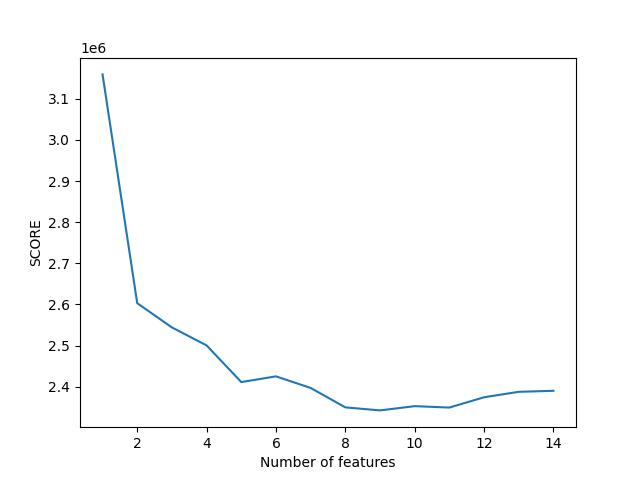


Como conclusión final, podemos observar que los cinco atributos más importantes incluyen las variables referentes a **'Upward longwave radiation'** y **'Upward shortwave radiation'** en la superficie. Además la variable dswrf_sfc, la cual es la mejor predictora de la salida, obviamente está entre este grupo. Por último, `tmp_sfc` (temperatura de la superficie) completa este grupo de los atributos más importantes.

## **Reducción de dimensionalidad**

En este apartado probaremos la alternativa seleccionada a la hora de reducir la dimensionalidad en nuestros modelos avanzados. Para Random Forest también compararemos el MAE obtenido en el PCA realizado anteriormente. En ambos métodos ajustaremos los hiperparametros como hacíamos anteriormente. 

### **SVMs**

In [42]:
print(f'[bold blue]\nSVMs\n----- [/bold blue]')

svm_r=SVR()
svm_r.fit(X_train_train_r_n, y_train_train_r_n.ravel())

# Hacer predicciones con los datos de validación.
svm_preds_r = svm_r.predict(X_train_validation_r_n)

# Desnormalizar las predicciones.
svm_preds_r = scaler.inverse_transform(svm_preds_r.reshape(-1, 1)).ravel()

# Calcular el error cuadrático medio en la escala original.
mae_svm_r = mae(y_train_validation_r, svm_preds_r)
print(f'\nMAE: {mae_svm_r}')

# Calcular el error cuadrático medio en la escala original.
rmse_svm_r = rmse(y_train_validation_r, svm_preds_r)
print(f'\nRMSE: {rmse_svm_r}')

# Ajuste de hiperparámetros.
svm_grid_r = GridSearchCV(SVR(),
                            param_grid=svm_params,
                            scoring='neg_mean_absolute_error',
                            cv=ps,
                            verbose=1,
                            n_jobs=-1)

svm_grid_r.fit(X_train_r_n, y_train_r_n.ravel())

model = SVR(**svm_grid_r.best_params_)

model.fit(X_train_train_r_n, y_train_train_r_n.ravel())

# Hacer predicciones con los datos de validación.
svm_preds_r_a = model.predict(X_train_validation_r_n)

# Deshacer la normalización.
svm_preds_r_a = scaler.inverse_transform(svm_preds_r_a.reshape(-1, 1)).ravel()

# Calcular el error cuadrático medio en la escala original.
mae_svm_r_a = mae(y_train_validation_r, svm_preds_r_a)

print(f'\nMAE: {mae_svm_r_a}')

SVMs
----- 

MAE: 2402238.6608334244

RMSE: 3003476.707362933

Fitting 1 folds for each of 3456 candidates, totalling 3456 fits


MAE: 2148772.926187713

### **Random Forests**

In [43]:
print(f'[bold blue]\nRandom Forests\n--------------- [/bold blue]')

rf_r=RandomForestRegressor()
rf_r.fit(X_train_train_r, y_train_train_r.ravel())

# Hacer predicciones con los datos de validación.
rf_preds_r = rf_r.predict(X_train_validation_r)

# Calcular el error cuadrático medio en la escala original.
mae_rf_r = mae(y_train_validation_r, rf_preds_r)
print(f'\nMAE: {mae_rf_r}')

# Calcular el error cuadrático medio en la escala original.
rmse_rf_r = rmse(y_train_validation_r, rf_preds_r)
print(f'\nRMSE: {rmse_rf_r}')

# Ajuste de hiperparámetros.
rf_grid_r = GridSearchCV(RandomForestRegressor(),
                            param_grid=rf_params,
                            scoring='neg_mean_absolute_error',
                            cv=ps,
                            verbose=1,
                            n_jobs=-1)

rf_grid_r.fit(X_train_r, y_train_r.ravel())

mae_rf_r2_a = -rf_grid_r.best_score_

print(f'\nMAE: {mae_rf_r2_a}')


Random Forests
--------------- 

MAE: 2401875.0578082195

RMSE: 3293983.4515232453

Fitting 1 folds for each of 32 candidates, totalling 32 fits


MAE: 2374185.876

### **Comparativa de resultados**

In [44]:
print('[bold red]' + '-' * 60 +'\nComparativa de resultados.\n' + '-' * 60 + '[/bold red]')

print(f'[bold blue]\nSVMs\n----- [/bold blue]')

print(f'\nMAE SVM: {mae_svm}')
print(f'MAE SVM reducida: {mae_svm_r}')
print(f'Ratio mae_svm/mae_svm_r: {mae_svm/mae_svm_r}')

print(f'\nMAE SVM ajustado: {mae_svm_a}')
print(f'MAE SVM ajustado reducida: {mae_svm_r_a}')
print(f'Ratio mae_svm_a/mae_svm_r_a: {mae_svm_a/mae_svm_r_a}')

print(f'[bold blue]\nRandom Forests\n--------------- [/bold blue]')

print(f'\nMAE RF: {mae_rf}')
print(f'\nMAE RF reducida con estrategia anterior: {mae_rf_r}')
print(f'\nRatio mae_rf/mae_rf_r: {mae_rf/mae_rf_r}')

print(f'\nMAE RF ajustado: {mae_rf_a}')
print(f'\nMAE RF ajustado reducida con PCA: {mae_rf_r1_a}')
print(f'\nMAE RF ajustado reducida con estrategia anterior: {mae_rf_r2_a}')
print(f'\nRatio mae_rf_a/mae_rf_r2_a: {mae_rf_a/mae_rf_r2_a}')
print(f'Ratio mae_rf_a/mae_rf_r1_a: {mae_rf_a/mae_rf_r1_a}')
print(f'Ratio mae_rf_r1_a/mae_rf_r2_a: {mae_rf_r1_a/mae_rf_r2_a}')

------------------------------------------------------------
Comparativa de resultados.
------------------------------------------------------------

SVMs
----- 

MAE SVM: 2299750.8057174054

MAE SVM reducida: 2402238.6608334244

Ratio mae_svm/mae_svm_r: 0.9573365224750557

MAE SVM ajustado: 2293796.2183049954

MAE SVM ajustado reducida: 2148772.926187713

Ratio mae_svm_a/mae_svm_r_a: 1.0674912134036323

Random Forests
--------------- 

MAE RF: 2223851.546246575

MAE RF reducida con estrategia anterior: 2401875.0578082195

Ratio mae_rf/mae_rf_r: 0.9258814437566557

MAE RF ajustado: 2174550.4182063206

MAE RF ajustado reducida con PCA: 2340805.6640986297

MAE RF ajustado reducida con estrategia anterior: 2374185.876

Ratio mae_rf_a/mae_rf_r2_a: 0.9159141414277037

Ratio mae_rf_a/mae_rf_r1_a: 0.928975203519798

Ratio mae_rf_r1_a/mae_rf_r2_a: 0.9859403544436844

Podemos observar que para **SVM**, sin ajustar tras reducir la dimensionalidad perdemos un 4.3% de precisión. Sin embargo, tras ajustar ganamos un 6.7% de precisión respecto al modelo ajustado sin hacer la reducción. Este modelo se convierte, hasta el momento, en el **mejor modelo con el dataframe reducido**.

Para **Random Forest**, observamos que la reducción de dimensiones pasa más factura que en el resto de modelos. Se pierde un 8.5% de precisión en su versión sin ajustar, un 6.8% de precisión en el modelo del PCA y un 2% de precisión en el uso del dataframe reducido ajustado.


## **Comparativa del MAE de todos los modelos**

In [45]:
print('[bold red]' + '-' * 60 +'\nMAE de los modelos ajustados.\n' + '-' * 60 + '[/bold red]')
print(f'[bold blue]\nKNN\n----- [/bold blue]')
print(f'\nMAE KNN: {mae_knn_a}')
print(f'\nMAE KNN reducido: {mae_knn_a_r}')

print(f'[bold blue]\nÁrbol de decisión\n----- [/bold blue]')
print(f'\nMAE Árbol de decisión: {mae_tree_a}')
print(f'\nMAE Árbol de decisión reducido: {mae_tree_a_r}')

print(f'[bold blue]\nRegresión Lineal\n----- [/bold blue]')
print(f'\nMAE Regresión Lineal: {mae_linear_a}')
print(f'\nMAE Regresión Lineal reducido: {mae_linear_a_r}')

print(f'[bold blue]\nSVMs\n----- [/bold blue]')
print(f'\nMAE SVM: {mae_svm_a}')
print(f'\nMAE SVM reducido: {mae_svm_r_a}')

print(f'[bold blue]\nRandom Forests\n--------------- [/bold blue]')
print(f'\nMAE RF: {mae_rf_a}')
print(f'\nMAE RF reducido con PCA: {mae_rf_r1_a}')
print(f'\nMAE RF reducido con estrategia anterior: {mae_rf_r2_a}')

------------------------------------------------------------
MAE de los modelos ajustados.
------------------------------------------------------------

KNN
----- 

MAE KNN: 2328954.693791461

MAE KNN reducido: 2348893.9205479454

Árbol de decisión
----- 

MAE Árbol de decisión: 2470632.610462104

MAE Árbol de decisión reducido: 2570950.556720865

Regresión Lineal
----- 

MAE Regresión Lineal: 2143275.4134048363

MAE Regresión Lineal reducido: 2240450.2498463485

SVMs
----- 

MAE SVM: 2293796.2183049954

MAE SVM reducido: 2148772.926187713

Random Forests
--------------- 

MAE RF: 2174550.4182063206

MAE RF reducido con PCA: 2340805.6640986297

MAE RF reducido con estrategia anterior: 2374185.876

En estos resultados generales observamos que el **mejor modelo sin la reducción de datos es Regresión lineal**, y el **mejor modelo con la reducción aplicada es SVM**. Además, cabe recordar que el rendimiento de Regresión lineal con y sin ajustar es idéntico, por lo que usaremos su versión por defecto.

## **Conclusiones hasta el momento**

Para estos métodos avanzados no hemos observado mejoras significativas respecto a los métodos básicos; de hecho la única mejora es la ya comentada tras la **reducción de dimensionalidad en SVM**. Es importante recalcar que para este apartado hemos realizado varias ejecuciones con distintas cantidades de combinaciones de hiperparámetros sin querer sobresaturar la ejecución, ya que los **tiempos de entrenamiento son bastante superiores**, aun así se recomienda tener paciencia. Para comparar los errores utilizaremos el **MAE**.
<br><br>
Primero nos fijamos en los resultados sin ajustar. Para **SVM** tenemos un error de aproximadamente 2.3 millones de unidades, lo cual es mejor que todos los modelos básicos salvo el de regresión lineal, que es aproximadamente un 7% más preciso. En cuanto al tiempo de entrenamiento, es más lento que los métodos básicos (con árboles de decisión empata prácticamente).
<br><br>
Para **Random Forests**, encontramos que sin ajustar es ligeramente mejor que todos los métodos en general, salvo el de regresión lineal, que es aproximadamente un 7% más preciso. En cuanto a tiempo de entrenamiento, es el más lento con diferencia, siendo el tiempo de entrenamiento mayor que 15 segundos cuando el resto no llegan al segundo de entrenamiento.
<br><br>
Podemos ver que ambos métodos no mejoran más de un 2% con su ajuste, aún así consiguen los mismos resultados que sin ajustar, siendo los dos mejores modelos tras regresión lineal. Hemos limitado las combinaciones debido al **alto tiempo de entrenamiento**. Esto hace que estos métodos no sean aconsejables con el dataframe original debido al alto tiempo que tarda su ajuste y entrenamiento; este factor es especialmente relevante para Random Forests. 
<br><br>
Por último, cabe mencionar que SVM muestra su utilidad al entrenar los modelos con el dataframe reducido, siendo el que mejor se comporta para ese dataframe y obteniendo un 6.7% más de precisión que con el dataframe original. Siendo además el segundo modelo (la versión del dataframe reducida) más preciso, con solo un 0.25% de empeoramiento respecto al mejor (Regresión lineal con el data frame original); recordemos que este modelo tan solo usa 12 columnas.


# **Selección del mejor método**
Como hemos visto en las evaluaciones de los apartados anteriores, el mejor modelo sin la reducción de datos es Regresión Lineal y el mejor modelo con la reducción aplicada es SVMs. Por tanto, a continuación usaremos la partición de test original para evaluar ambos métodos. Tras evaluar las métricas de ambos, seleccionaremos el mejor de los dos para entrenar el modelo final y hacer predicciones para el conjunto de datos de la competición.


## **Regresión Lineal**
A modo de resumen, el modelo de Regresión Lineal con el que obtenemos un MAE de 2143275.41 es el modelo base (sin ajuste de hiperparámetros ni reducción de dimensionalidad) en el que se usan los datos normalizados.

In [51]:
print('\n[bold yellow]Regresión lineal\n------------------[/bold yellow]')

model = LinearRegression()

start = time.time()
model.fit(X_train_n, y_train_n)
end = time.time()
tiempo_linear = end - start
print(f'Tiempo de entrenamiento: {tiempo_linear:.5f} segundos.')

y_pred_n = model.predict(X_test_n)

y_pred = scaler.inverse_transform(y_pred_n)

rmse_linear = rmse(y_test, y_pred)
print(f'\nRMSE: {rmse_linear}')

mae_linear = mae(y_test, y_pred)
print(f'MAE: {mae_linear}')

Regresión lineal
------------------

Tiempo de entrenamiento: 0.01747 segundos.

RMSE: 3190863.2262594877

MAE: 2181484.362370056

## **SVMs**
El modelo de SVMs con el que obtenemos un MAE de 2148772.93 es el modelo en el que se ha reducido la dimensionalidad y, además, se han ajustado los hiperparámetros.

In [52]:
print(f'[bold yellow]\nSVMs\n----- [/bold yellow]')

model = SVR(**svm_grid_r.best_params_)

start = time.time()
model.fit(X_train_n, y_train_n.ravel())
end = time.time()
tiempo_svm = end - start
print(f'Tiempo de entrenamiento: {tiempo_svm:.5f} segundos.')

svm_preds_n = model.predict(X_test_n)

svm_preds = scaler.inverse_transform(svm_preds_n.reshape(-1, 1)).ravel()

rmse_svm = rmse(y_test, svm_preds)
print(f'\nRMSE: {rmse_svm}')

mae_svm = mae(y_test, svm_preds)
print(f'\nMAE: {mae_svm}')

SVMs
----- 

Tiempo de entrenamiento: 0.43618 segundos.

RMSE: 3125302.980576356

MAE: 2258295.860645682

# **Conclusiones finales**

In [53]:
print('[bold red]' + '-' * 60 +'\nComparativa de resultados.\n' + '-' * 60 + '[/bold red]')
print(f'[bold blue]\nRegresión Linear\n----- [/bold blue]')
print(f'\nRMSE: {rmse_linear}')
print(f'MAE: {mae_linear}')
print(f'Tiempo de entrenamiento: {tiempo_linear}')

print(f'[bold blue]\nSVMs\n----- [/bold blue]')
print(f'\nRMSE: {rmse_svm}')
print(f'MAE: {mae_svm}')
print(f'Tiempo de entrenamiento: {tiempo_svm}')

print(f'[bold yellow]\nRatios\n----- [/bold yellow]')
print(f'\nRatio rmse_linear/rmse_svm: {rmse_linear/rmse_svm}')
print(f'Ratio mae_linear/mae_svm: {mae_linear/mae_svm}')
print(f'Ratio tiempo_linear/tiempo_svm: {tiempo_linear/tiempo_svm}')


------------------------------------------------------------
Comparativa de resultados.
------------------------------------------------------------

Regresión Linear
----- 

RMSE: 3190863.2262594877

MAE: 2181484.362370056

Tiempo de entrenamiento: 0.01747417449951172

SVMs
----- 

RMSE: 3125302.980576356

MAE: 2258295.860645682

Tiempo de entrenamiento: 0.43617701530456543

Ratios
----- 

Ratio rmse_linear/rmse_svm: 1.0209772447953323

Ratio mae_linear/mae_svm: 0.9659869640580822

Ratio tiempo_linear/tiempo_svm: 0.04006211672412446

Como podemos ver en el análisis de los dos mejores modelos anteriores, vemos que el claro ganador es el modelo de **Regresión Lineal**.
<br><br>
Pese a que SVMs posee un RMSE algo menor que Regresión Lineal, basándonos en la métrica MAE podemos ver como el de Regresión Lineal es cerca de un 4% mejor que SVMs. Además, se puede ver como el tiempo de entrenamiento del modelo de Regresión Lineal es mucho menor que el de SVMs.
<br><br>
Por tanto, para concluir podemos ver como finalmente los métodos avanzados no han resultado ser mejores en cuanto a las métricas que estamos evaluando si los comparamos con los métodos básicos. Pese a ser más complejos en su funcionamiento, no han resultado de mucha utilidad durante las evaluaciones debido a que no llegan a comportarse como se espera. Además, resulta tedioso realizar ajustes de hiperparámetros con SVMs y Random Forests ya que estos llegan a tardar varios minutos en buscar los mejores hiperparámetros usando, por ejemplo, GridSearch.
<br><br>
Además, recalcar que durante las evaluaciones de modelos hemos podido ver como en varias ocasiones los modelos sobreaprendían debido a la multitud de hiperparámetros que usábamos en los ajustes. Esto causaba que, dado que los modelos estaban aprendiendo los datos, no generalizasen bien y no fuesen válidos para el propósito final.
<br><br>
Tras todo el análisis, utilizaremos el modelo final para obtener predicciones para el conjunto de datos de la competición.